In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Business understanding**

*   **From Problem to Approach**

    * **Business Understanding** : 
    
      Build a early waring IDS which proactively detect the presence of significantly different state transitions of the system from its normal states

    * **Analytic Approach**
      
      Based on the different connection feature values we need to build a system which determine whether the network traffic/connection is an abnormal behavior or not.

      This is a **binary classification** problem.

# **Data Understanding/EDA**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install feature_engine

     |████████████████████████████████| 179 kB 12.0 MB/s 
     |████████████████████████████████| 9.5 MB 43.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
### Import all the required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import time
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from feature_engine.encoding import CountFrequencyEncoder
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import VarianceThreshold

In [ ]:
### Import the Dataset into pandas dataframe
raw_data = pd.read_csv('/content/drive/MyDrive/Anamoly.csv')
raw_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255.0,10.0,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255.0,1.0,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134.0,86.0,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3.0,57.0,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29.0,86.0,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


## Univariate Analysis

In [ ]:
raw_data.shape

(22544, 40)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   hot                          22544 non-null  int64  
 9   num_failed_logins            22544 non-null  int64  
 10  logged_in                    22544 non-null  int64  
 11  num_compromised              22544 non-null  int64  
 12  root_shell                   22544 non-null  int64  
 13  su_attempted    

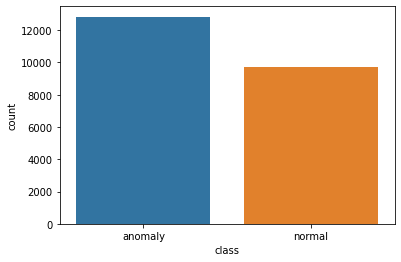

In [ ]:
### Chack the Dependet feature distribution
sb.countplot(raw_data['class'])

In [ ]:
100*(raw_data['class'].value_counts()/raw_data['class'].size)

anomaly    56.924237
normal     43.075763
Name: class, dtype: float64

**Comment :**  Target class distrubution looks balalnced, so there is not required any class imbalance treatment.

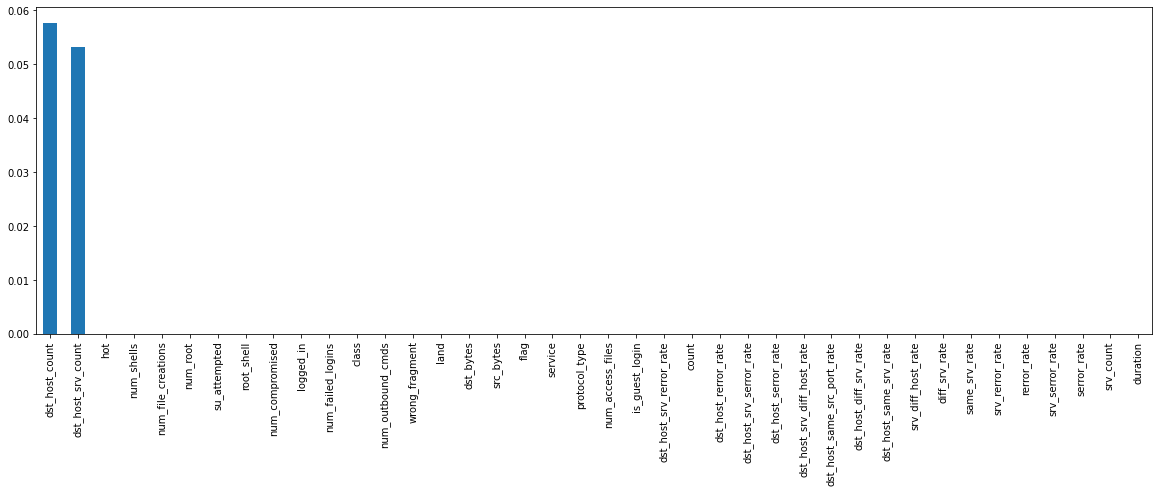

In [ ]:
### Find missing values in the features
plt.rcParams['figure.figsize'] = (20, 6)
(100*(raw_data.isna().sum()/raw_data.shape[0])).sort_values(ascending=False).plot(kind='bar')
plt.show()

**Comment :** 2 of the feature vectors has some missing values which needs to be taken care during data transformation.

### Check the distribution of each feature vectors

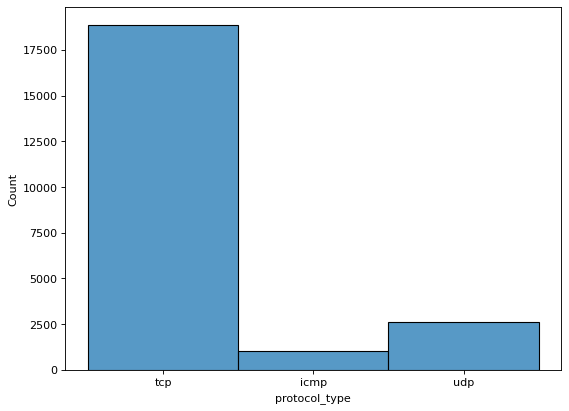

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sb.histplot(raw_data.protocol_type)

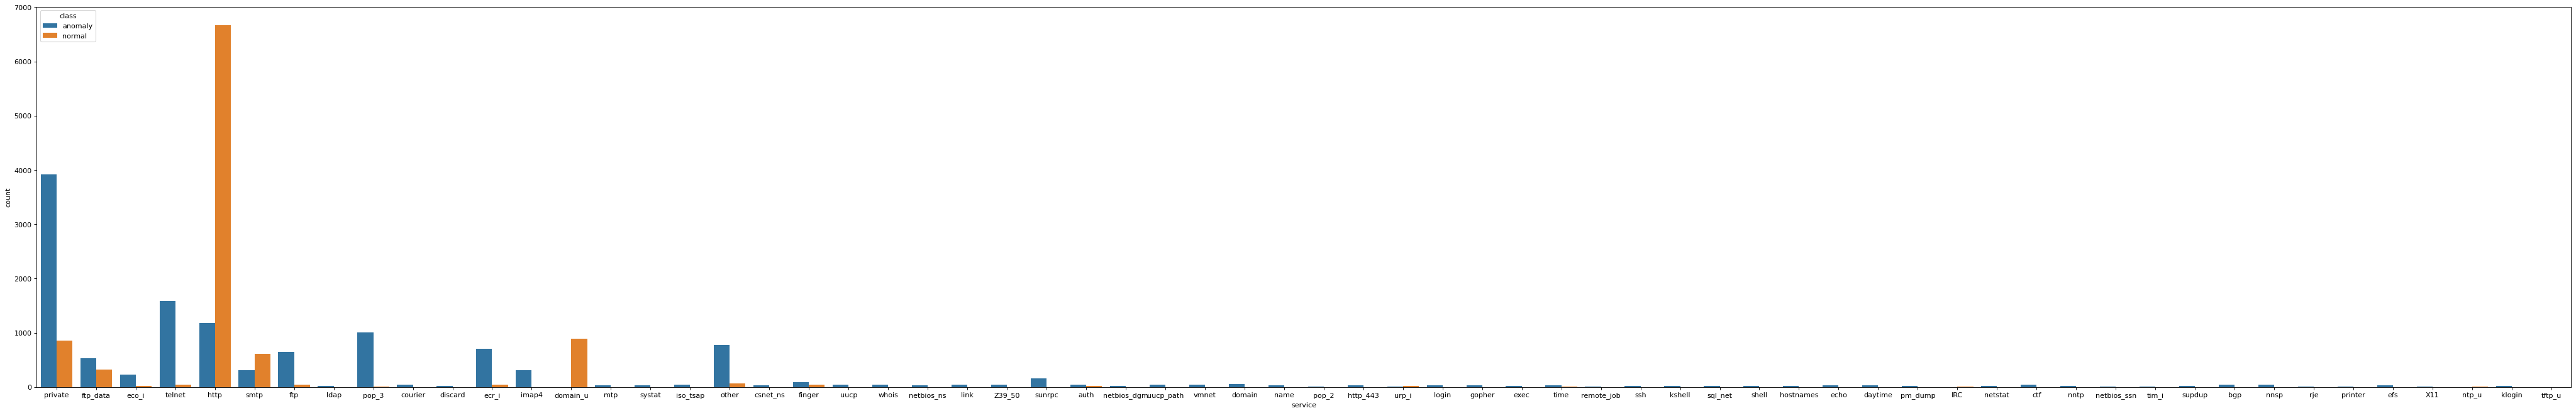

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(65, 10), dpi=80, facecolor='w', edgecolor='k')
sb.countplot(raw_data.service,hue=raw_data['class'])

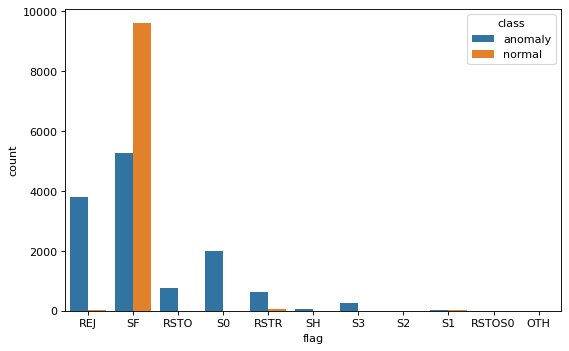

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.countplot(raw_data.flag,hue=raw_data['class'])

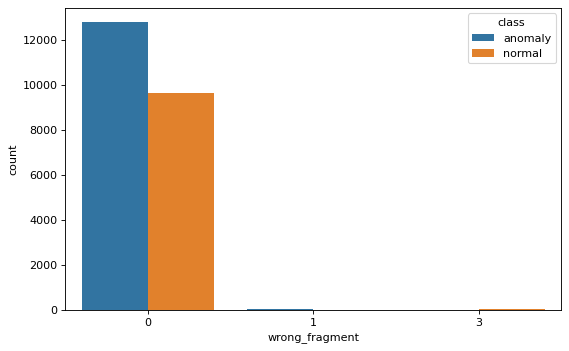

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.countplot(raw_data.wrong_fragment,hue=raw_data['class'])

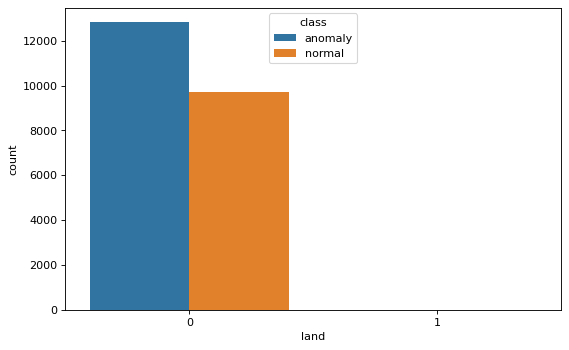

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.countplot(raw_data.land,hue=raw_data['class'])

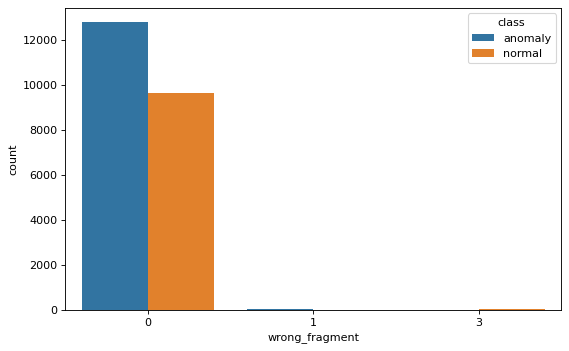

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.countplot(raw_data.wrong_fragment,hue=raw_data['class'])

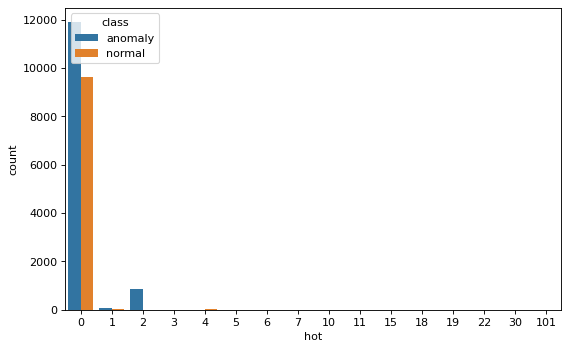

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.countplot(raw_data.hot,hue=raw_data['class'])

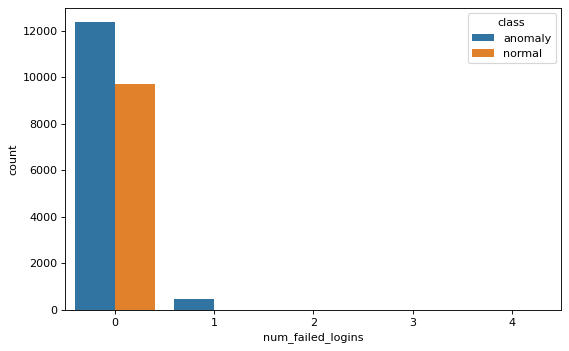

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.countplot(raw_data.num_failed_logins,hue=raw_data['class'])

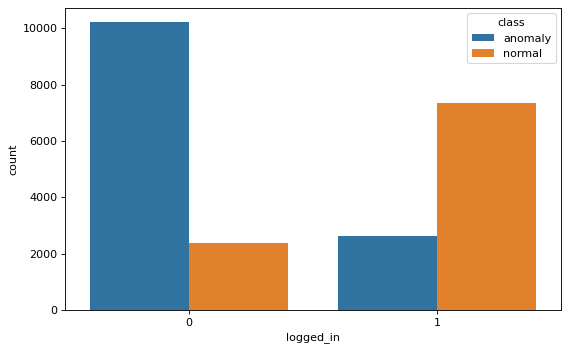

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.countplot(raw_data.logged_in,hue=raw_data['class'])

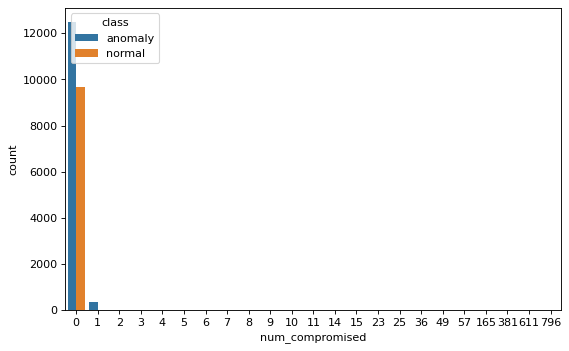

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.countplot(raw_data.num_compromised,hue=raw_data['class'])

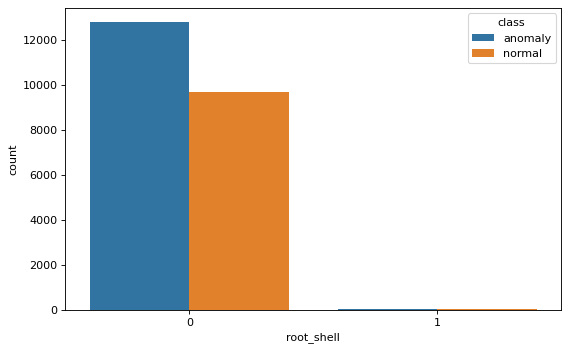

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.countplot(raw_data.root_shell,hue=raw_data['class'])

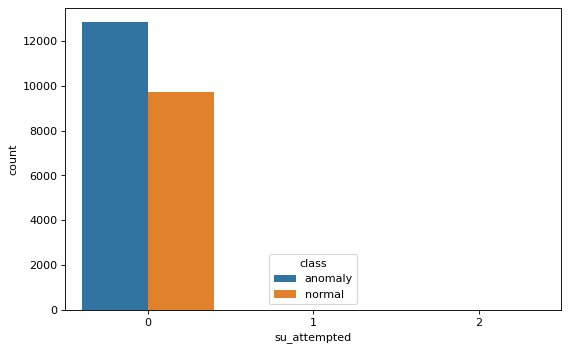

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.countplot(raw_data.su_attempted,hue=raw_data['class'])

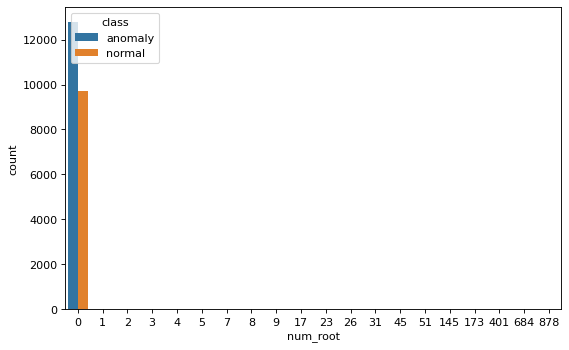

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.countplot(raw_data.num_root,hue=raw_data['class'])

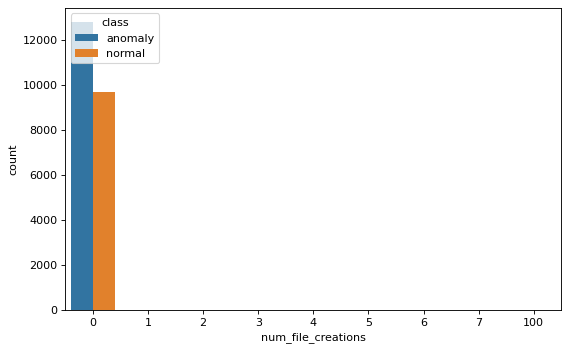

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.countplot(raw_data.num_file_creations,hue=raw_data['class'])

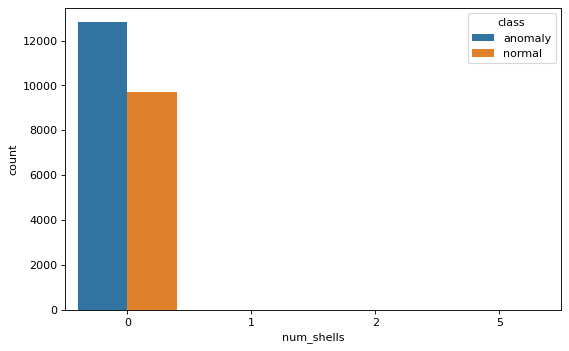

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.countplot(raw_data.num_shells,hue=raw_data['class'])

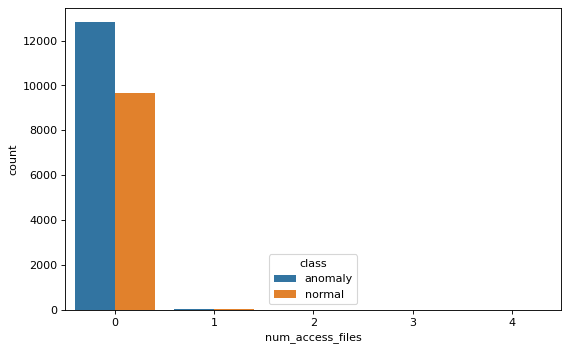

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.countplot(raw_data.num_access_files,hue=raw_data['class'])

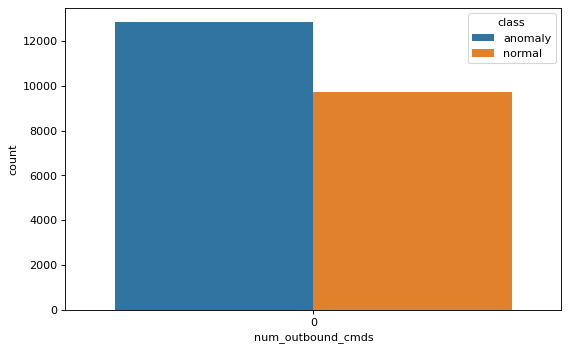

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.countplot(raw_data.num_outbound_cmds,hue=raw_data['class'])

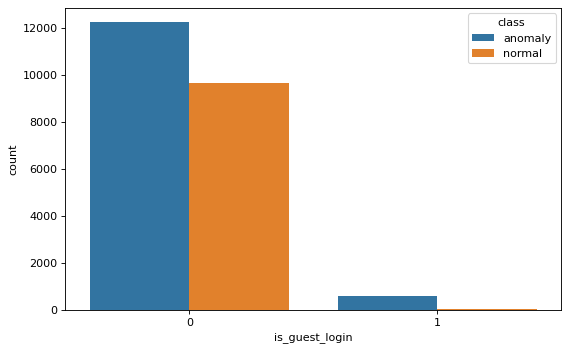

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.countplot(raw_data.is_guest_login,hue=raw_data['class'])

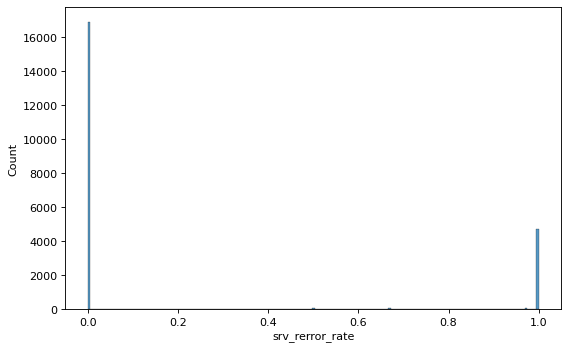

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.histplot(raw_data.srv_rerror_rate)

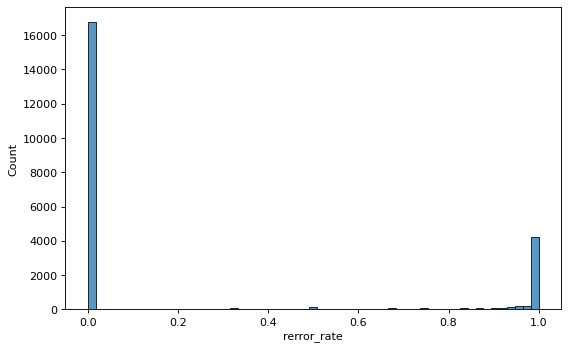

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.histplot(raw_data.rerror_rate)

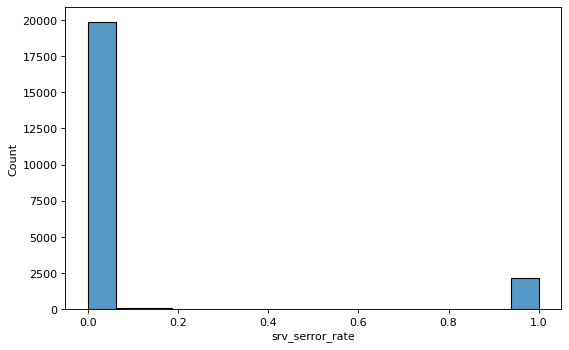

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.histplot(raw_data.srv_serror_rate)

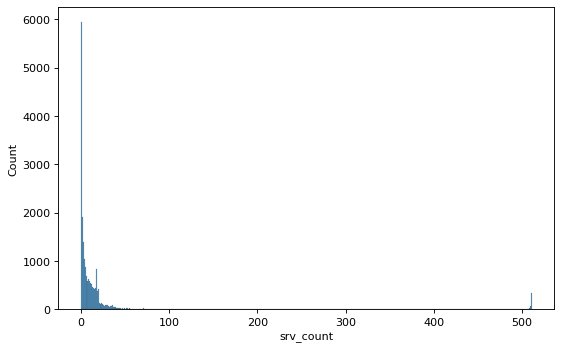

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.histplot(raw_data.srv_count)

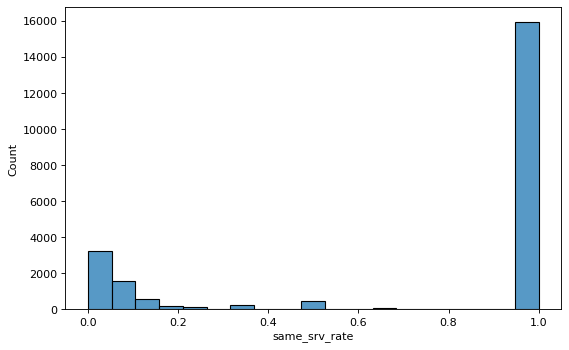

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.histplot(raw_data.same_srv_rate)

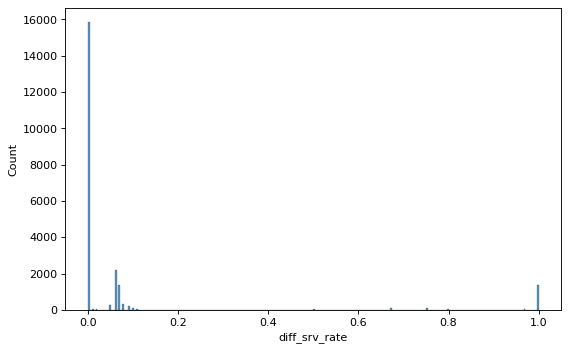

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.histplot(raw_data.diff_srv_rate)

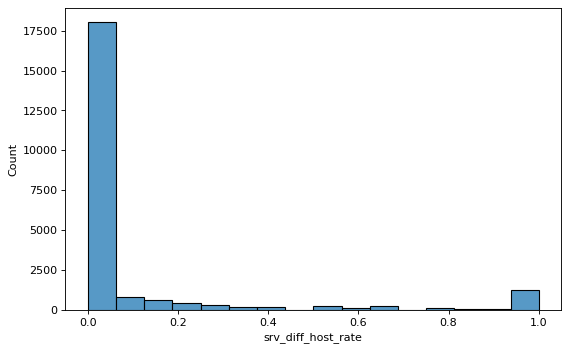

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.histplot(raw_data.srv_diff_host_rate)

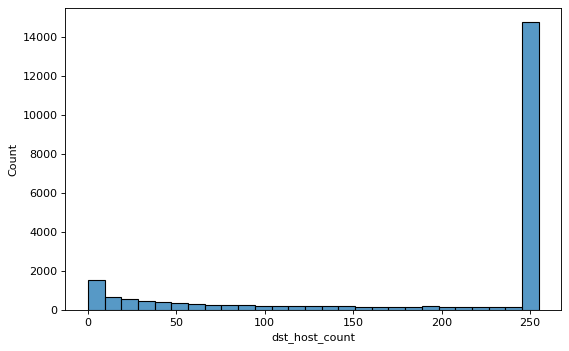

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.histplot(raw_data.dst_host_count)

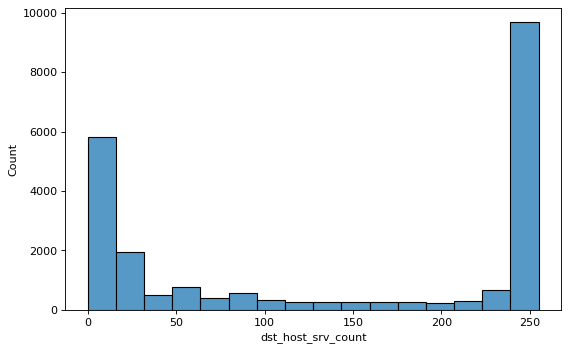

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.histplot(raw_data.dst_host_srv_count)

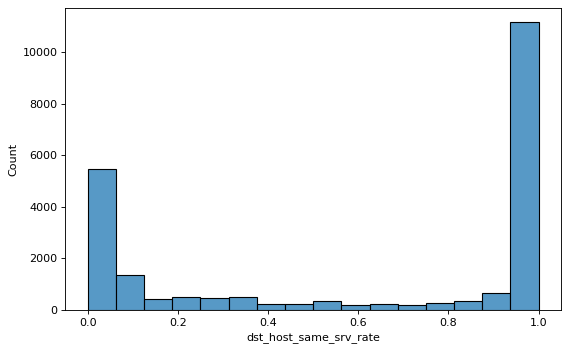

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.histplot(raw_data.dst_host_same_srv_rate)

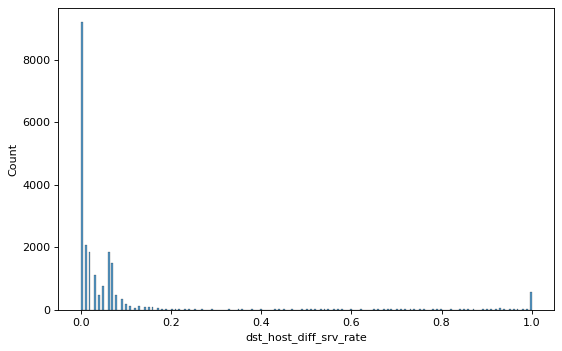

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.histplot(raw_data.dst_host_diff_srv_rate)

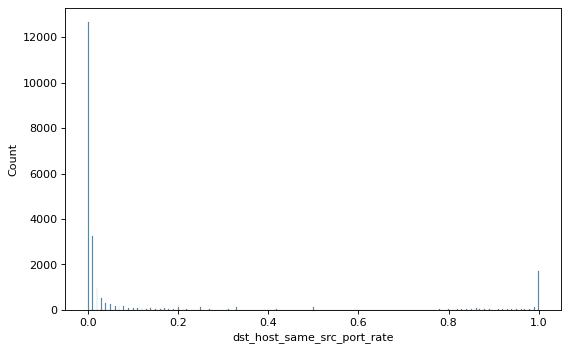

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.histplot(raw_data.dst_host_same_src_port_rate)

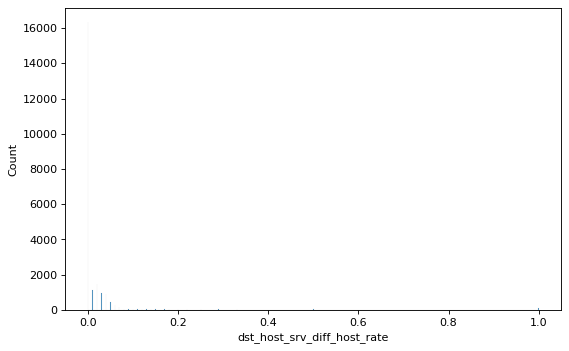

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.histplot(raw_data.dst_host_srv_diff_host_rate)

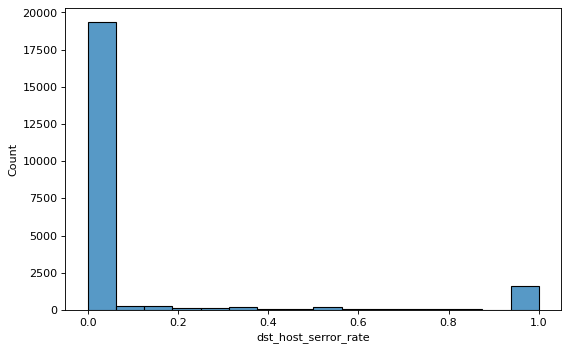

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.histplot(raw_data.dst_host_serror_rate)

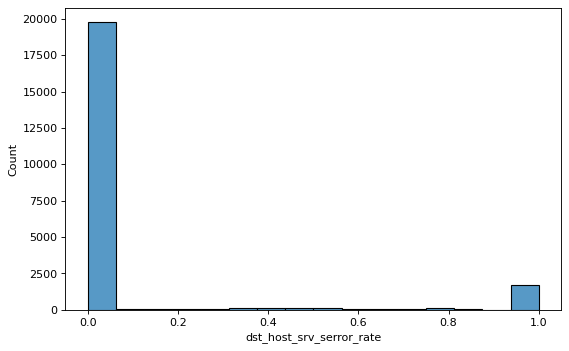

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.histplot(raw_data.dst_host_srv_serror_rate)

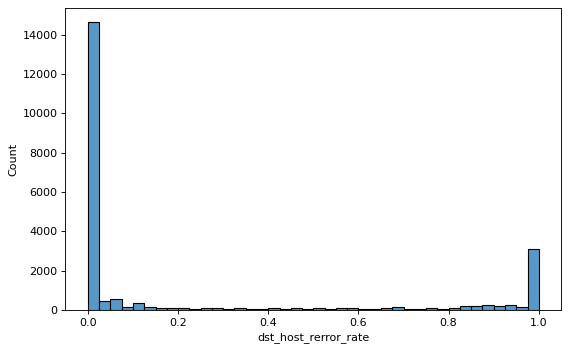

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.histplot(raw_data.dst_host_rerror_rate)

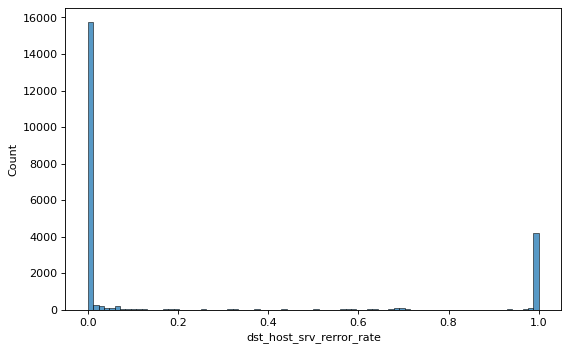

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.histplot(raw_data.dst_host_srv_rerror_rate)

### Conclusion

* There are mainly 3 types of network protocal (TCP, UDP, ICMP) data can be found in the dataset. Out of these 3 major rows belongs to TCP.

* Major chunk of private service traffic is found to be anomaly, the ratio of normal vs anomaly is about 1:4. Similarly for telnet, eco_i, ftp, ecr_i and pop_3 service traffic found to be anomaly most of the time compared to normal traffic.

* Columns like wrong_fragment, land, wrong_fragment, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, is_guest_login, rerror_rate, srv_serror_rate, srv_diff_host_rate, dst_host_same_src_port_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate, are very much sparse in nature.

* Columns like num_outbound_cmds, dst_host_count, dst_host_same_srv_rate, dst_host_srv_count, dst_host_diff_srv_rate has no variance/less variance in the data

## Bivariate Analysis

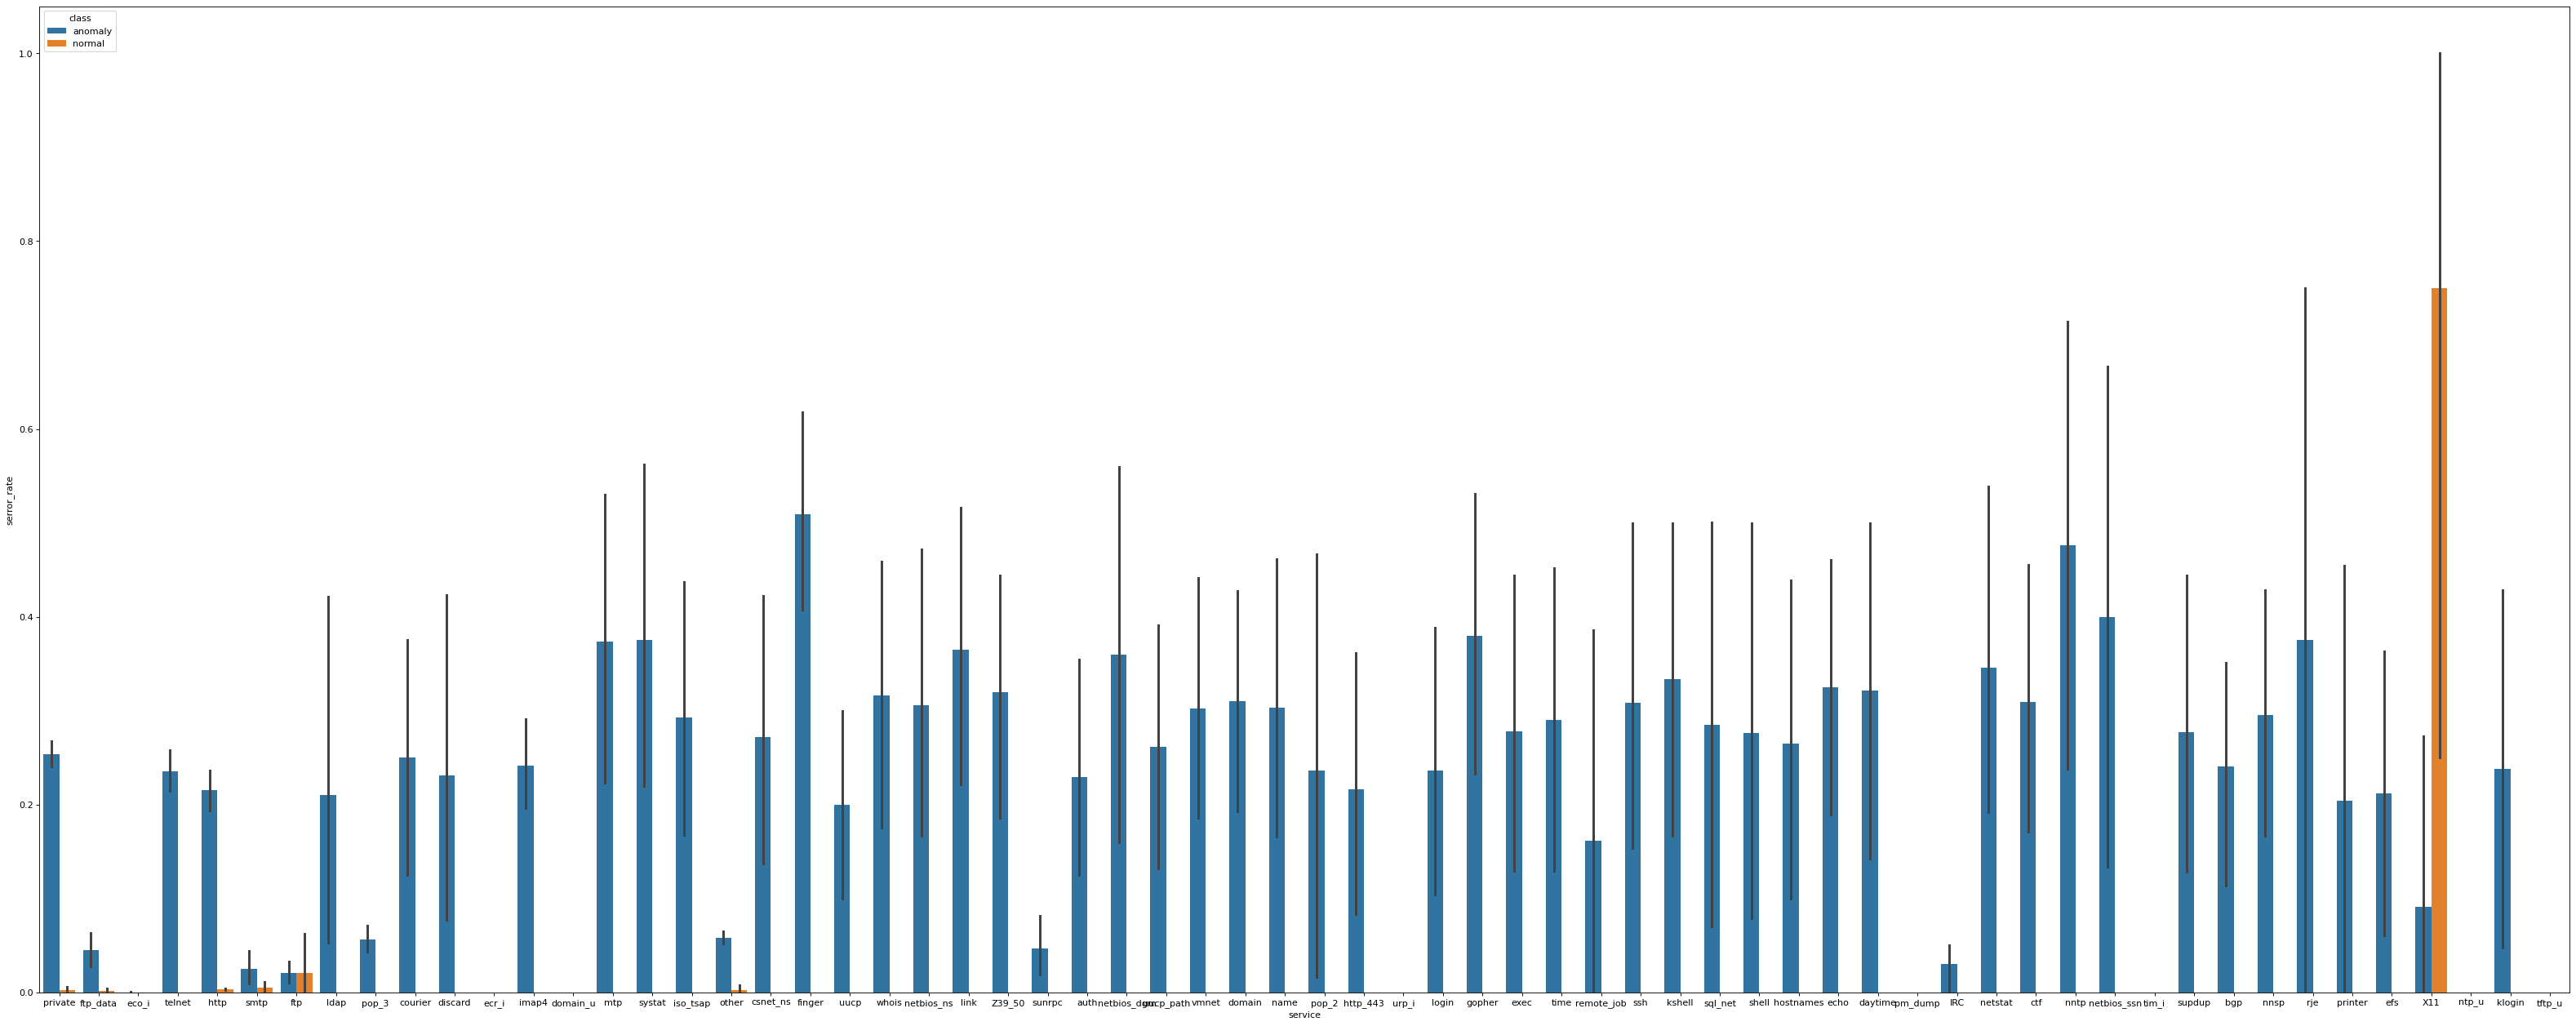

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
sb.barplot(y=raw_data.serror_rate,hue=raw_data['class'], x=raw_data.service)

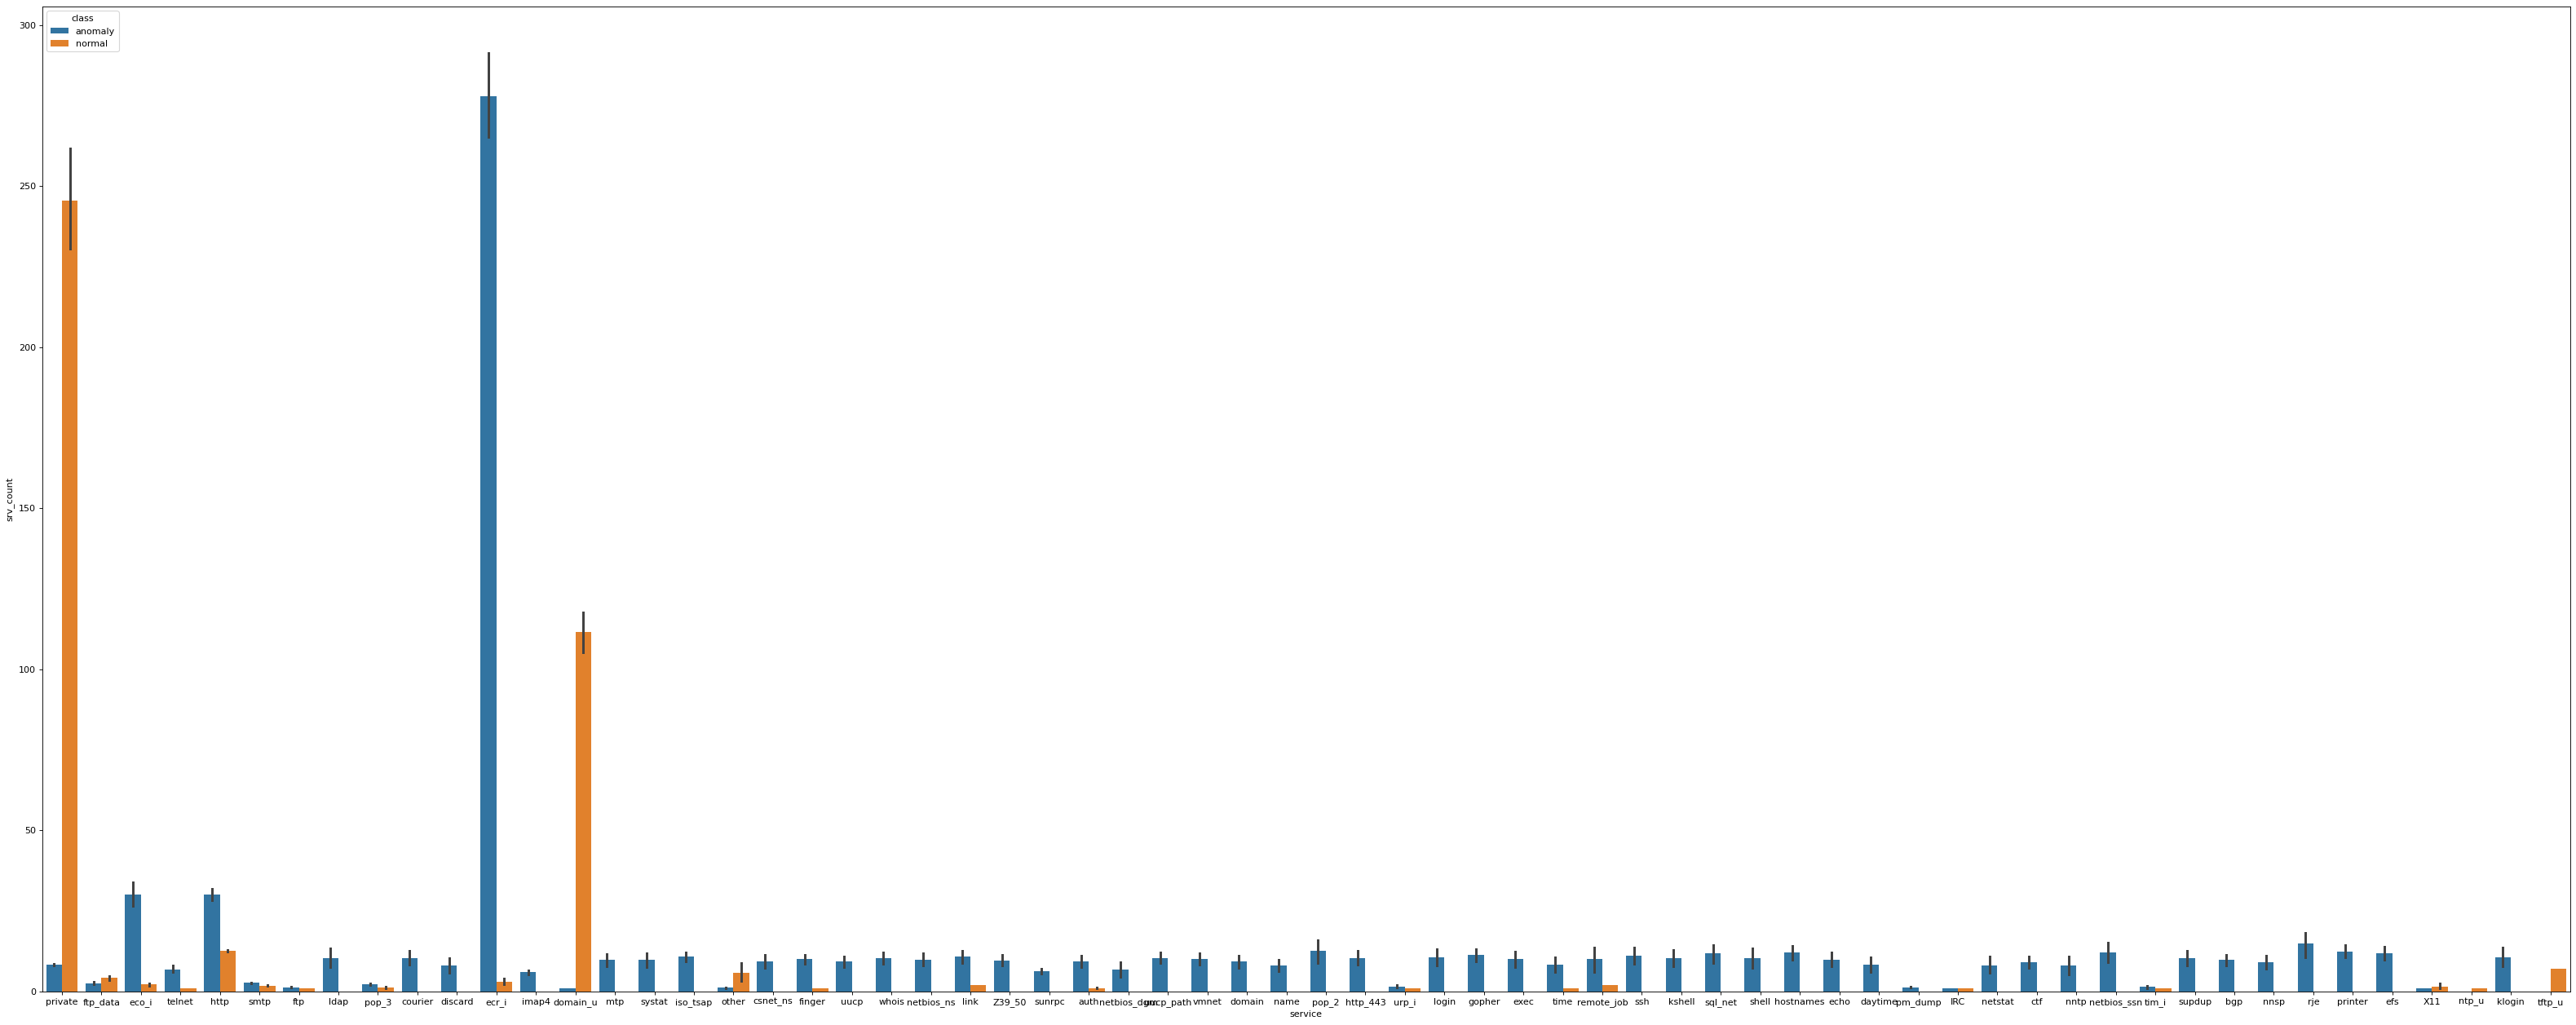

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
sb.barplot(y=raw_data.srv_count,hue=raw_data['class'], x=raw_data.service)

In [ ]:
raw_data.query('root_shell==0 ').num_access_files

0        0
1        0
2        0
3        0
4        0
        ..
22539    0
22540    0
22541    0
22542    0
22543    0
Name: num_access_files, Length: 22489, dtype: int64

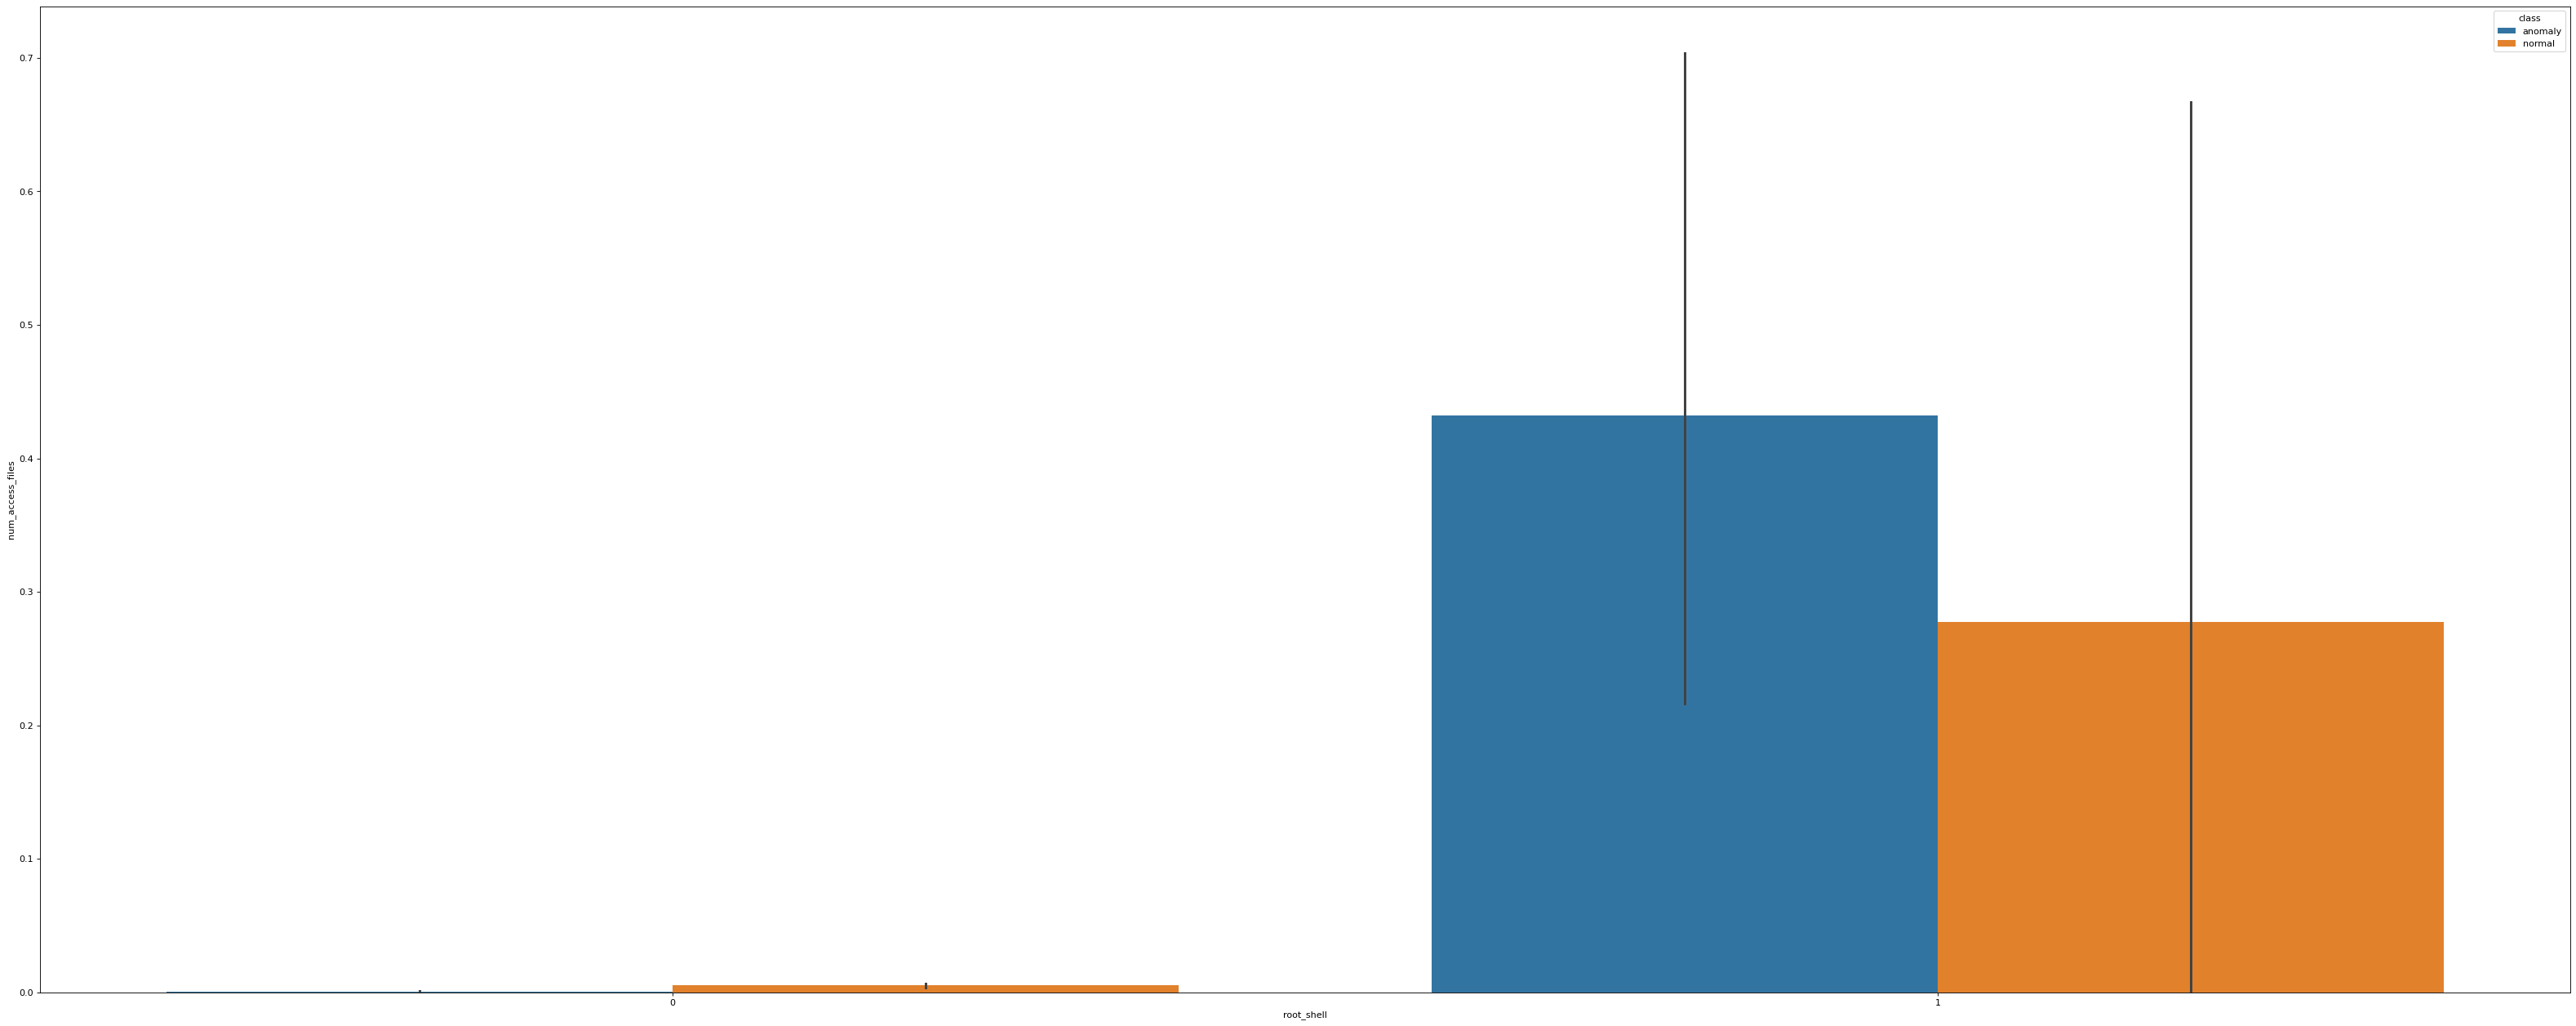

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
sb.barplot(y=raw_data.num_access_files,hue=raw_data['class'], x=raw_data.root_shell)

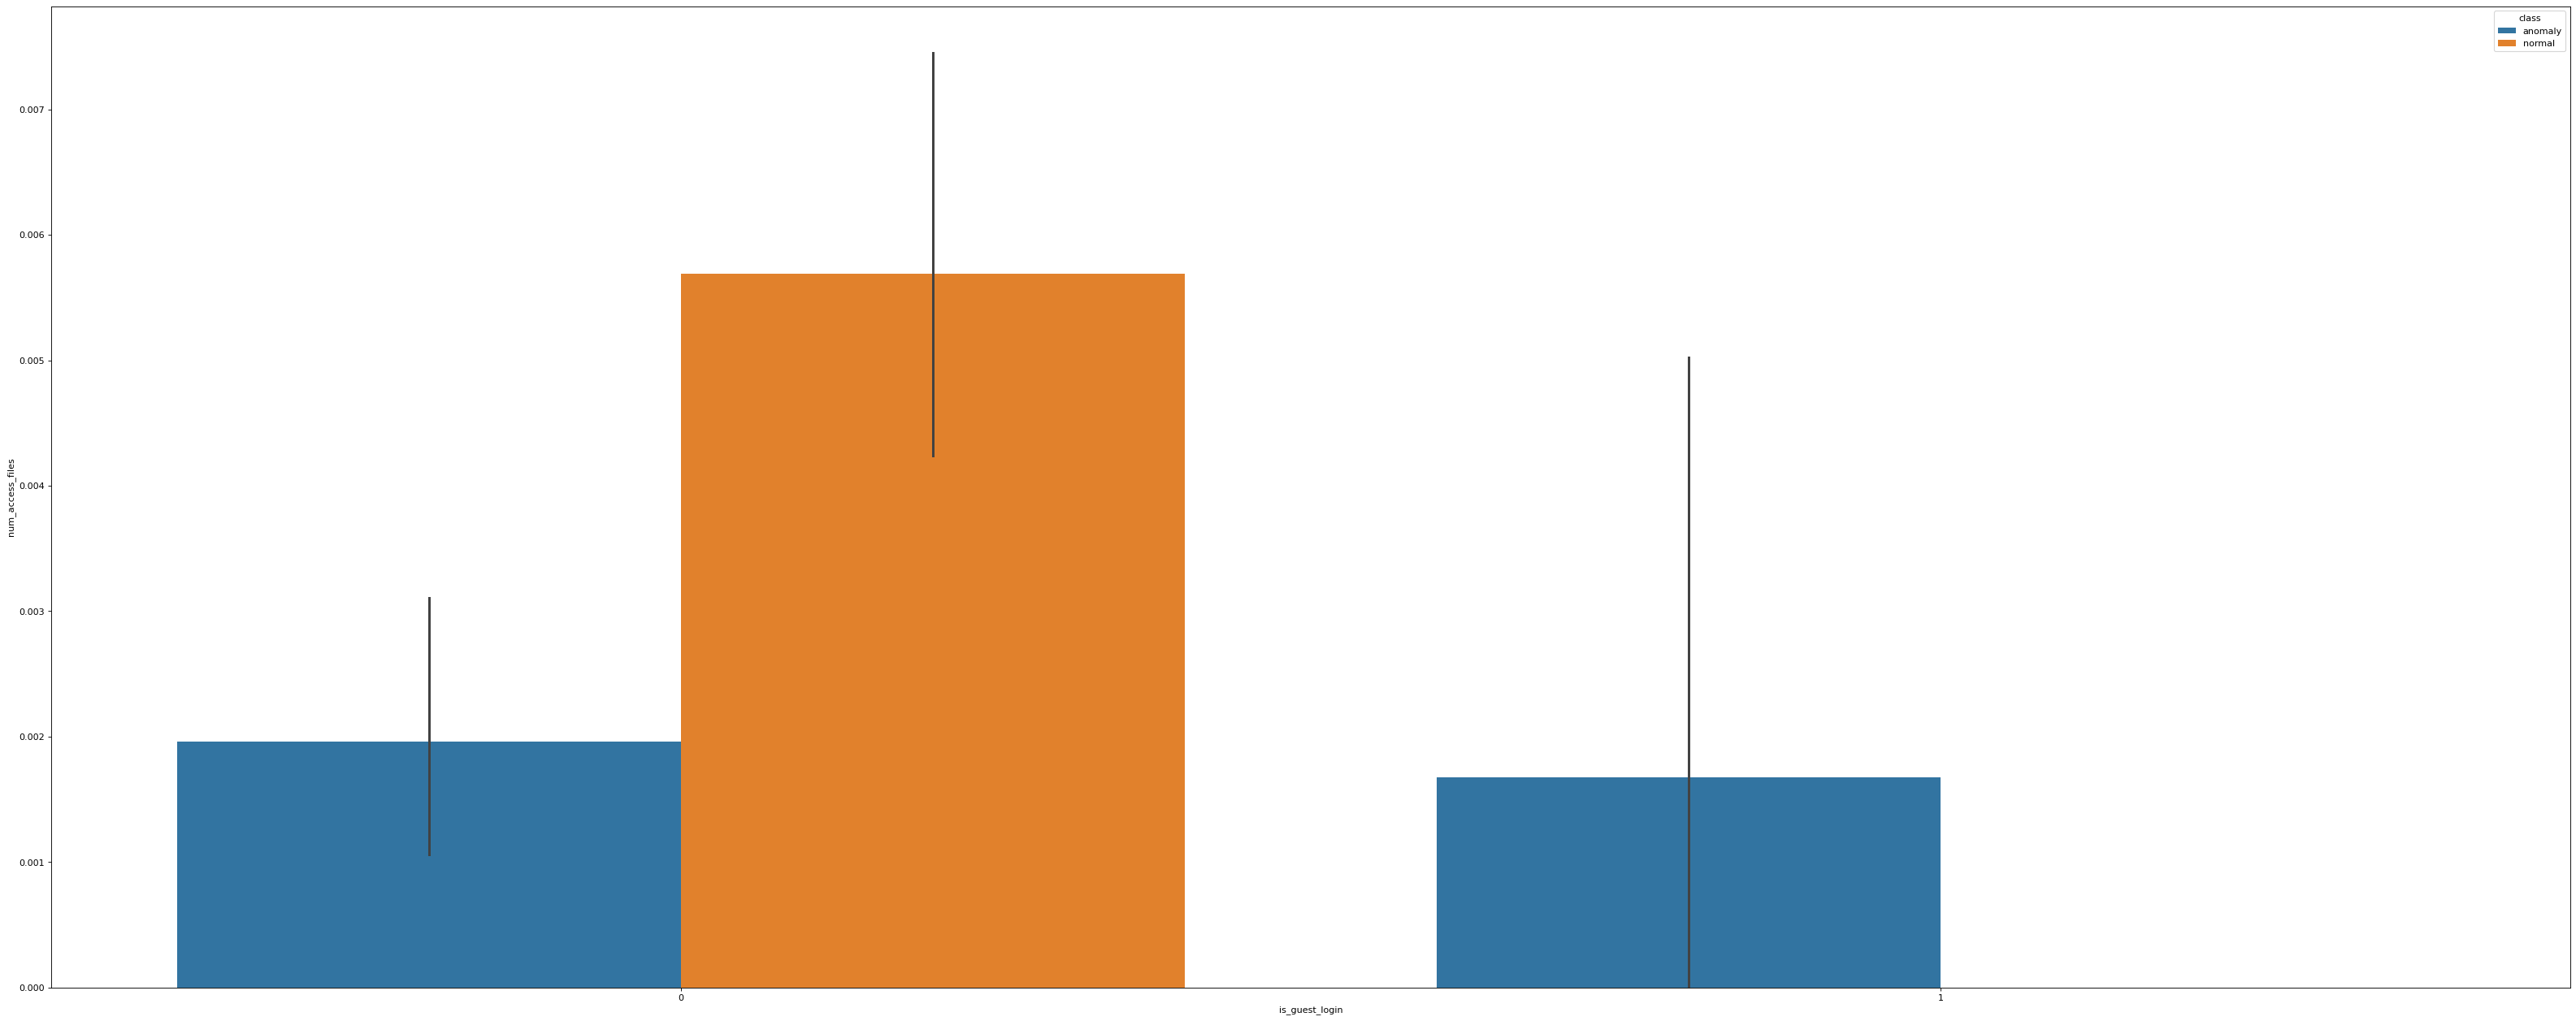

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
sb.barplot(y=raw_data.num_access_files,hue=raw_data['class'], x=raw_data.is_guest_login)

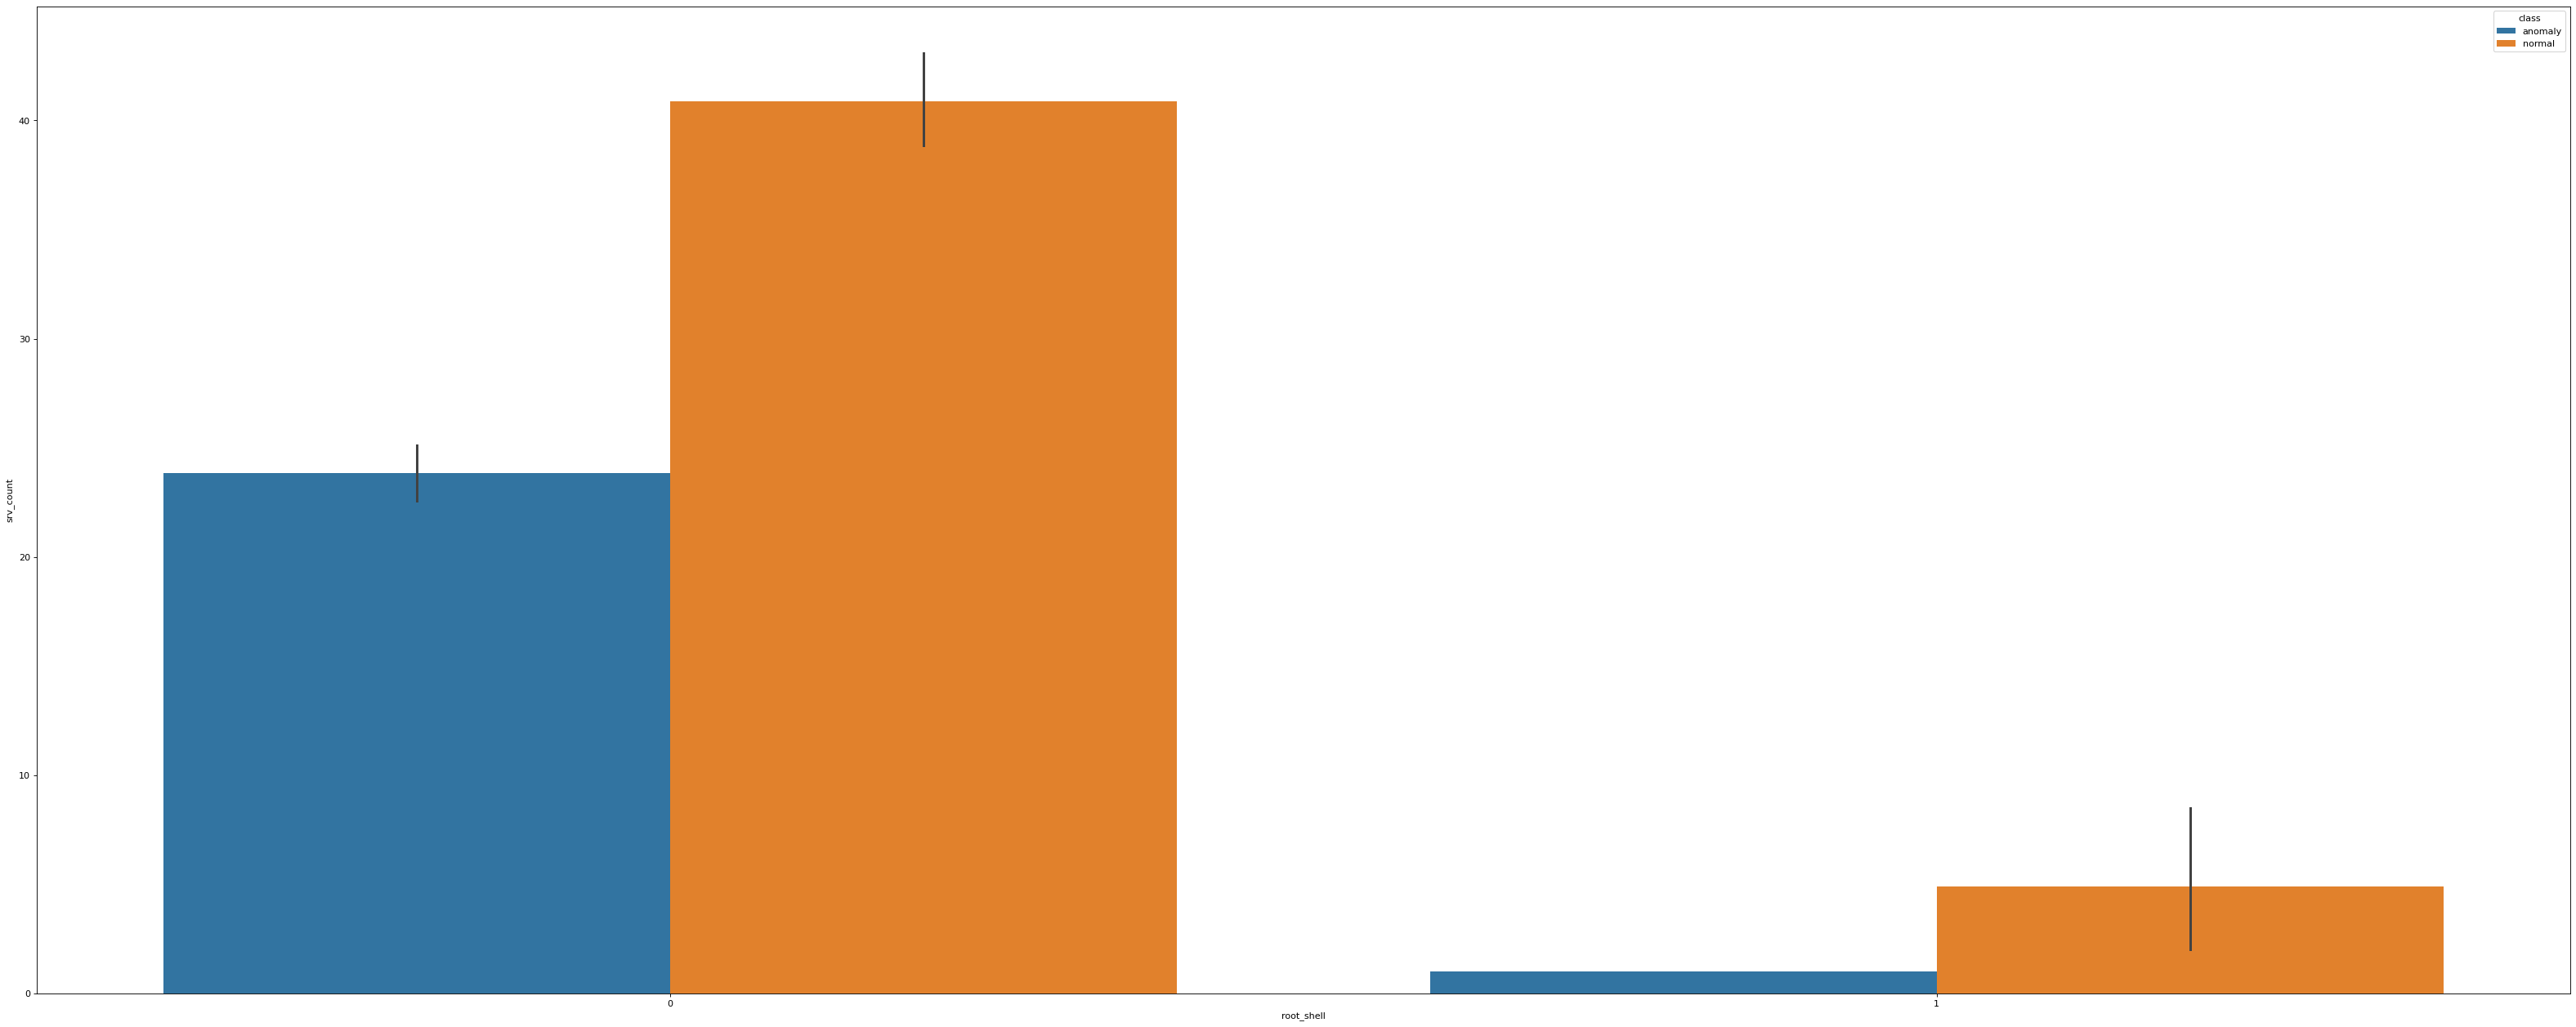

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
sb.barplot(y=raw_data.srv_count,hue=raw_data['class'], x=raw_data.root_shell)

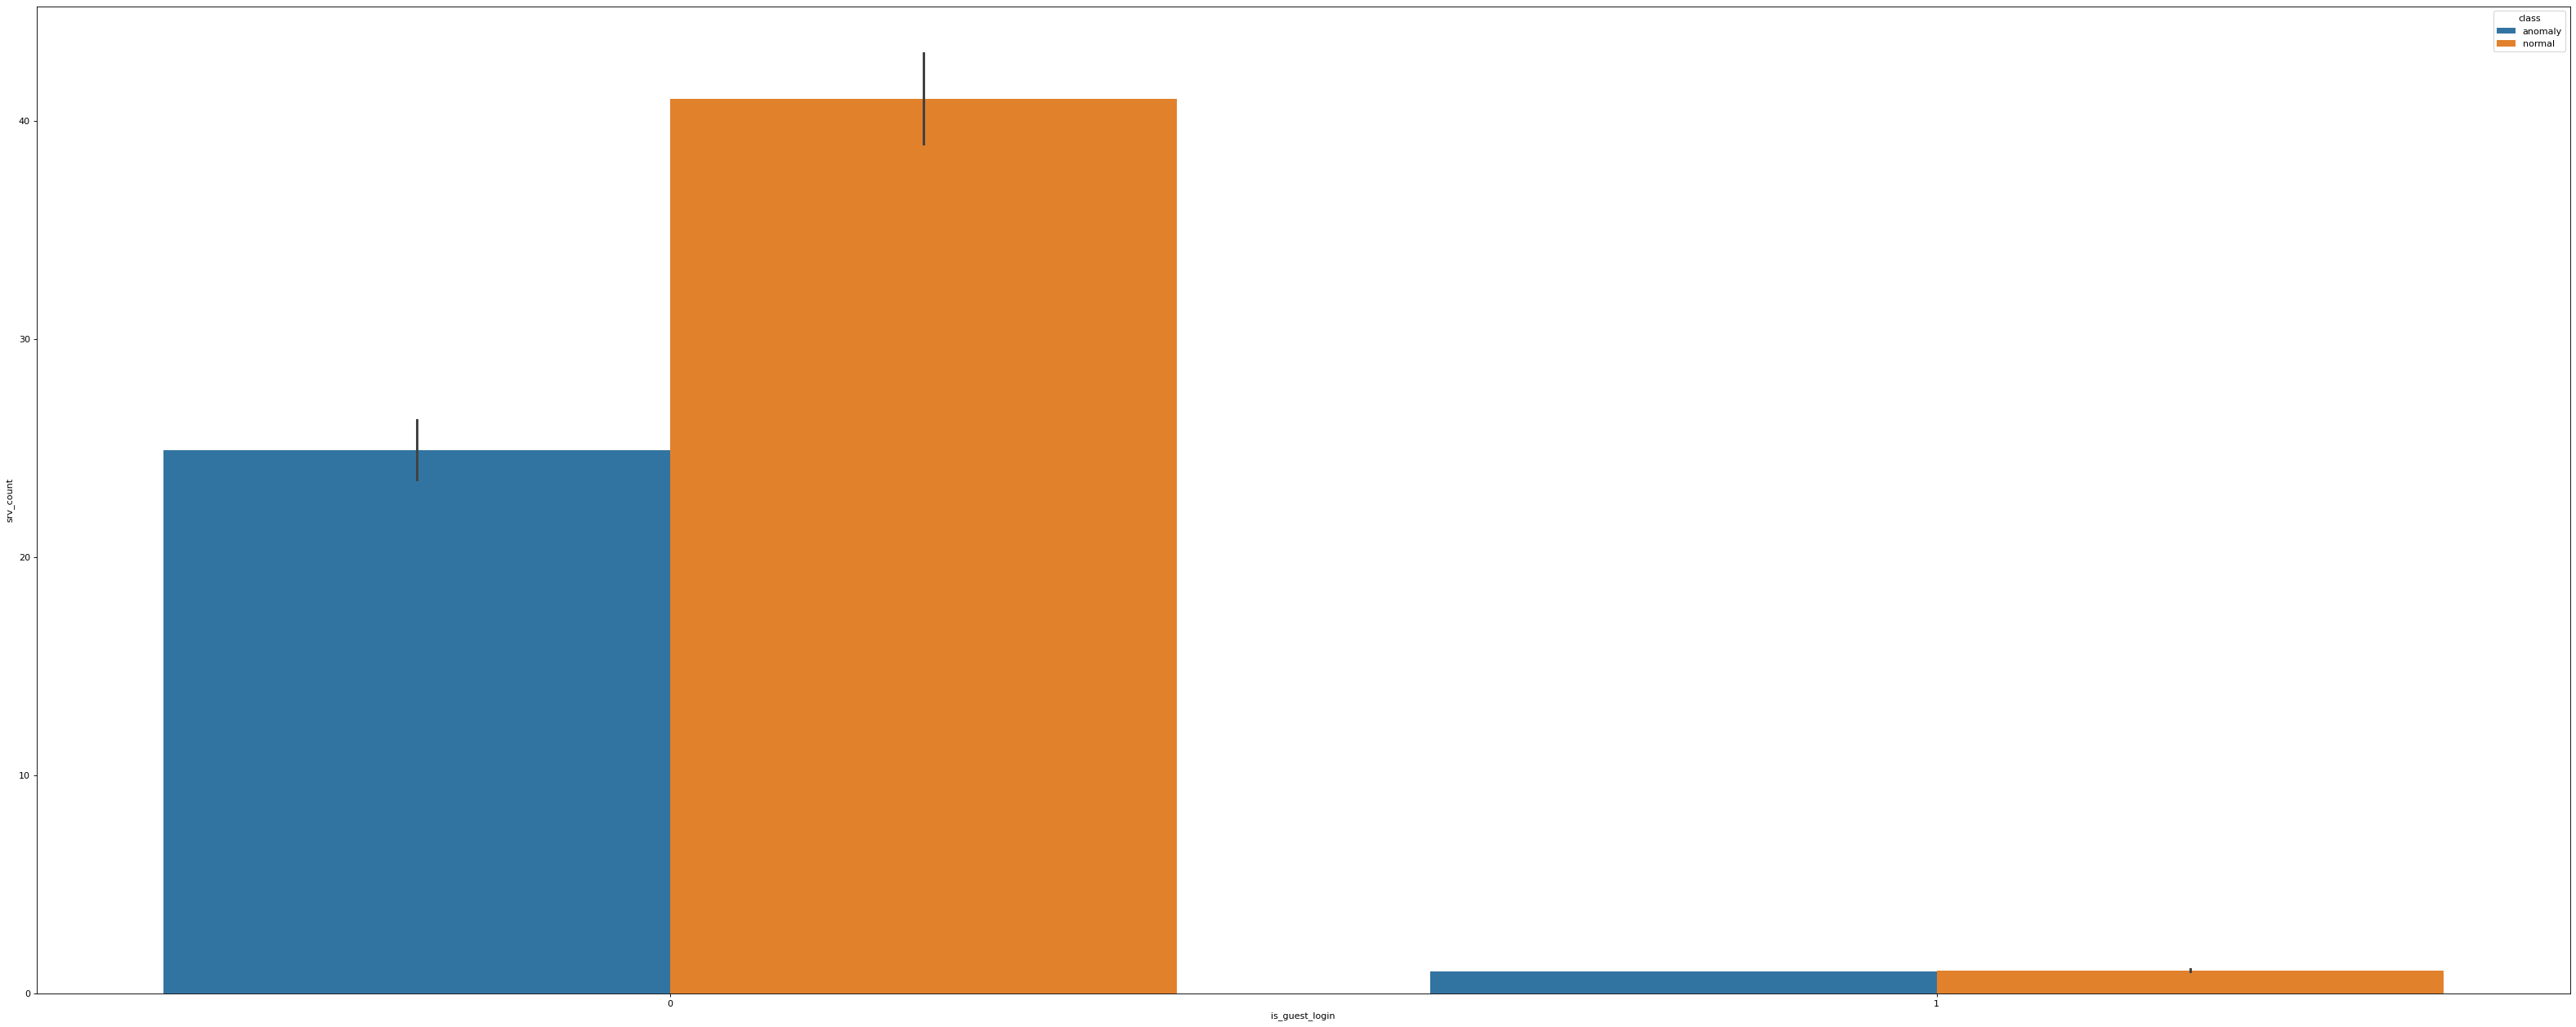

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
sb.barplot(y=raw_data.srv_count,hue=raw_data['class'], x=raw_data.is_guest_login)

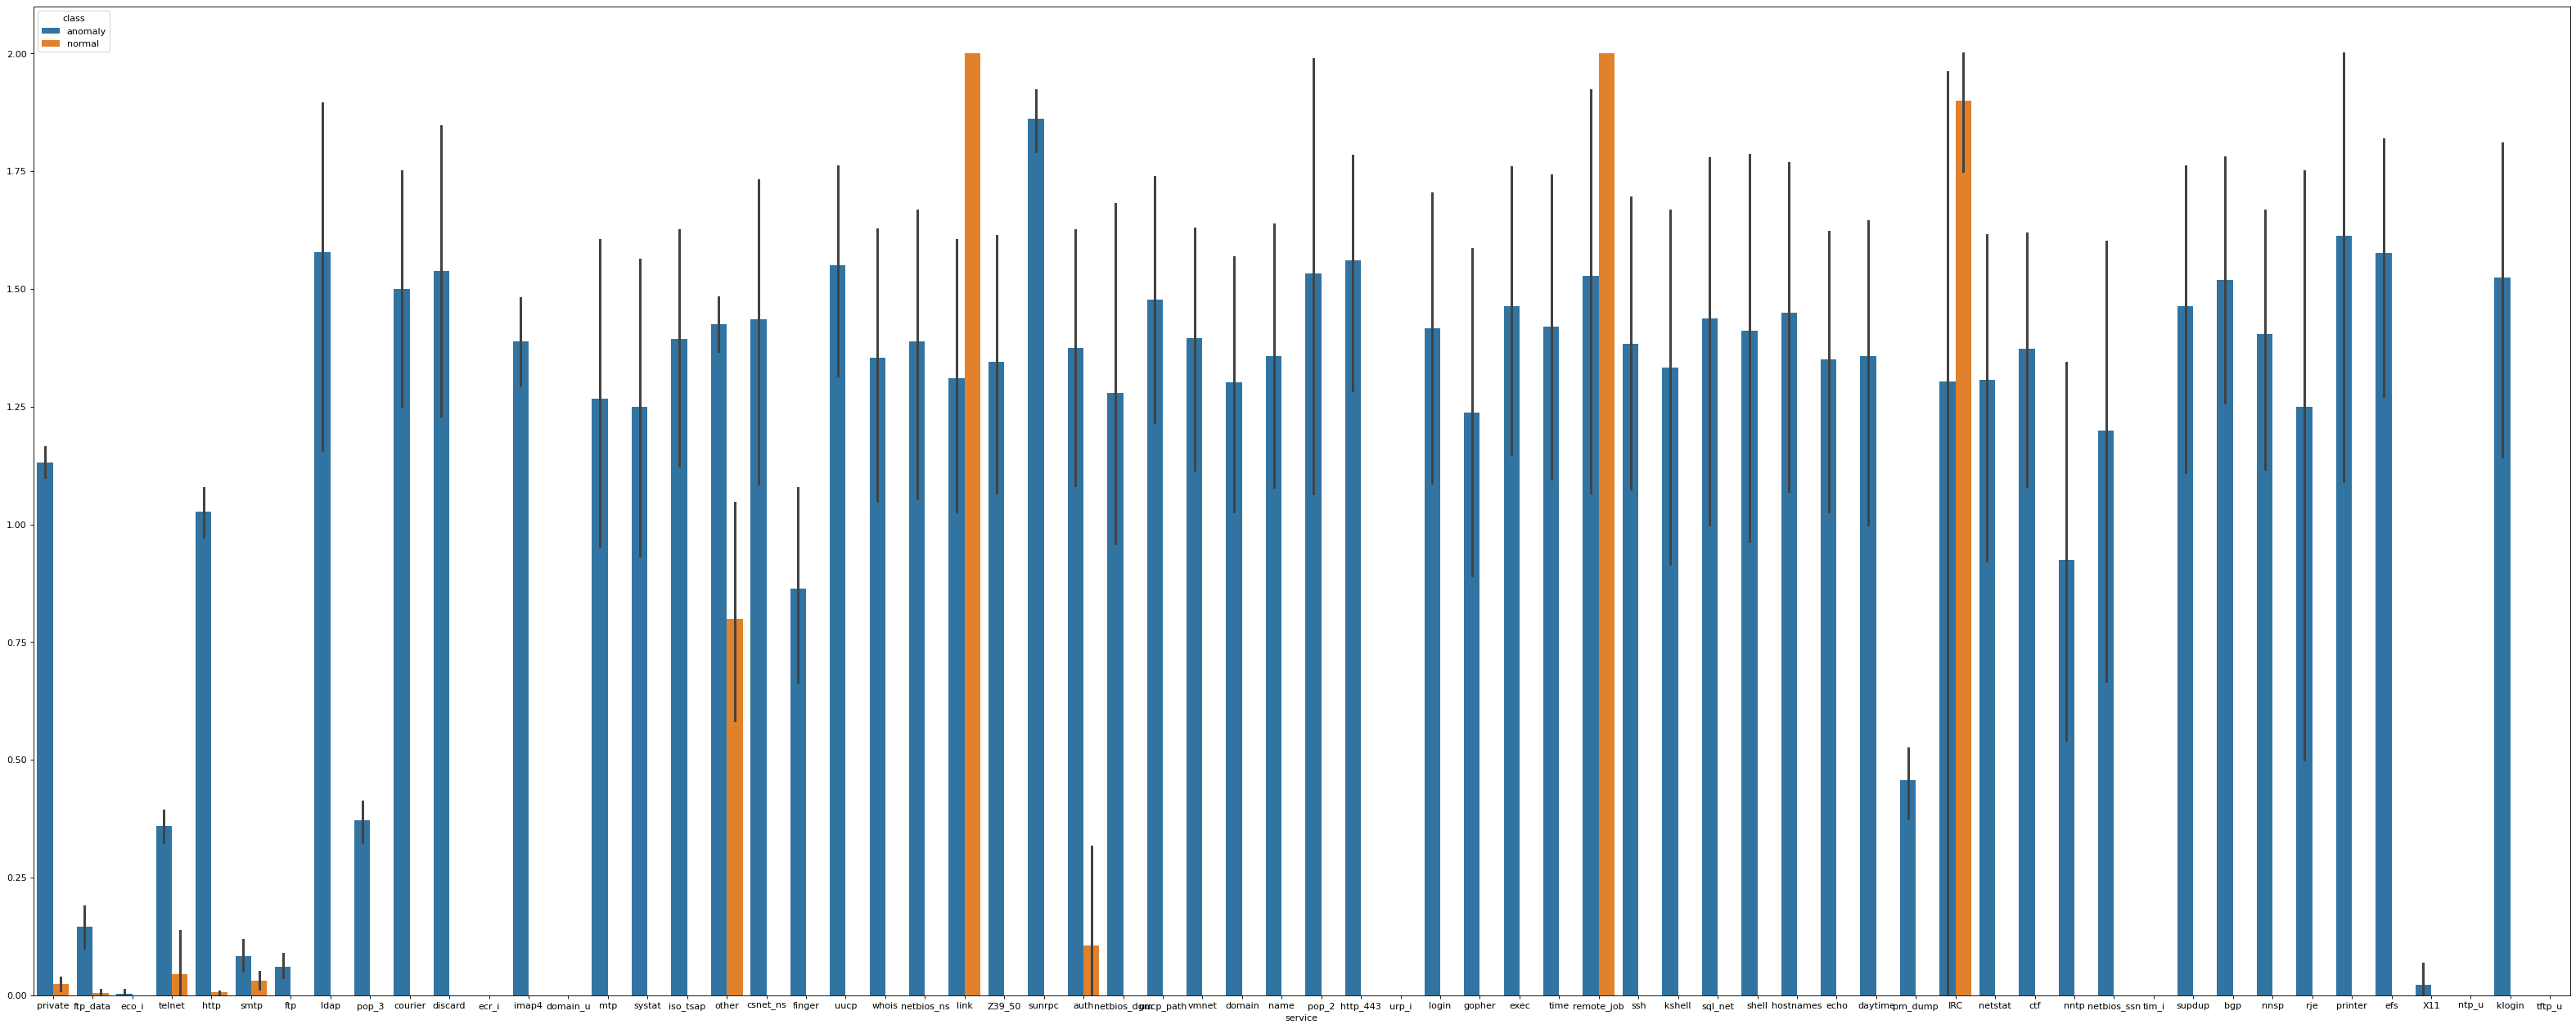

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
sb.barplot(y=raw_data.rerror_rate+raw_data.srv_rerror_rate,hue=raw_data['class'], x=raw_data.service)

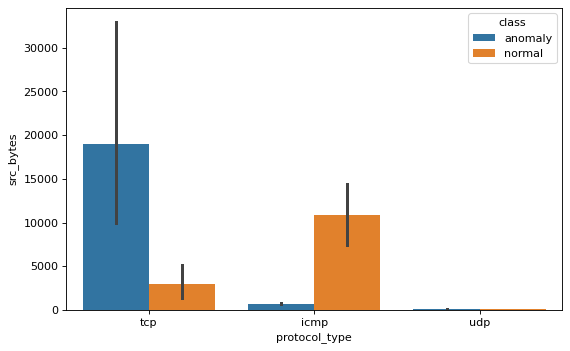

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.barplot(y=raw_data.src_bytes, x=raw_data['protocol_type'], hue=raw_data['class'])

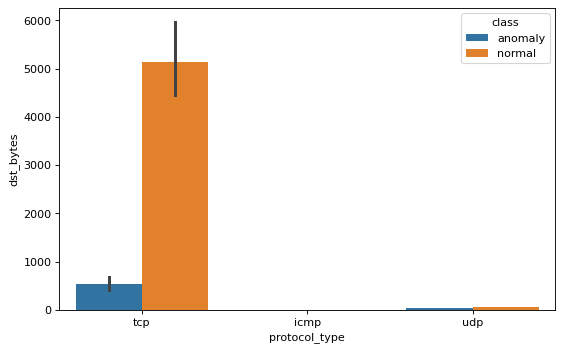

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sb.barplot(y=raw_data.dst_bytes, x=raw_data['protocol_type'], hue=raw_data['class'])

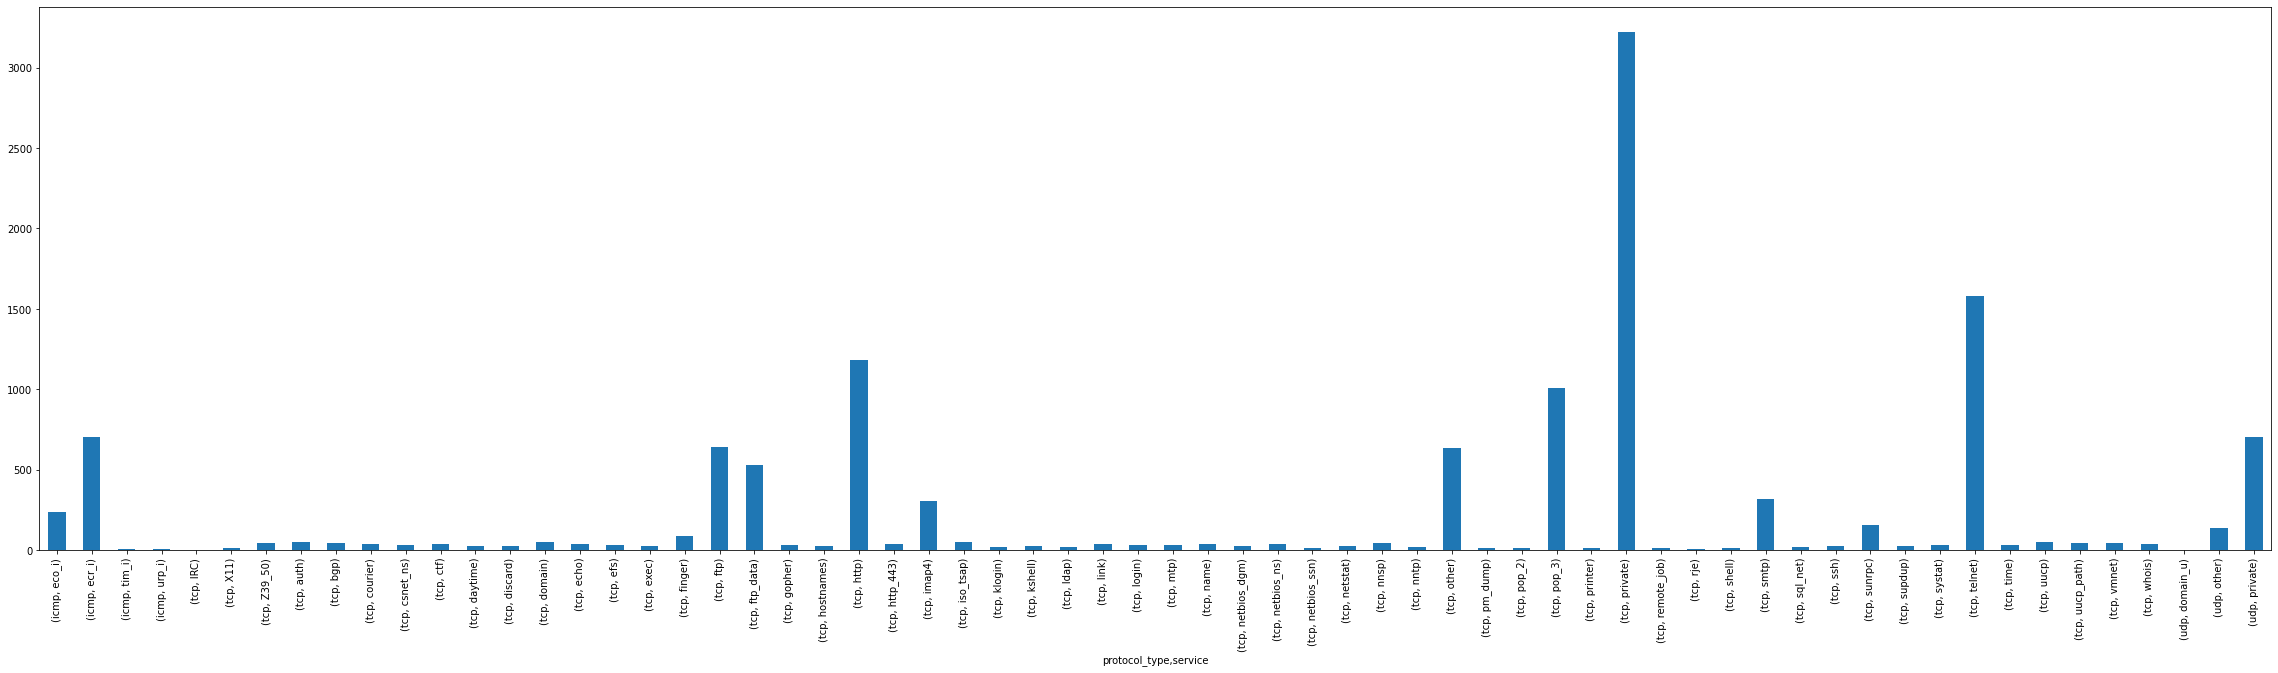

In [ ]:
plt.rcParams['figure.figsize'] = (40, 10)
raw_data.loc[raw_data['class'] == 'anomaly'].groupby(['protocol_type','service'])['class'].count().plot(kind='bar')

### Conclusion

* There is a high error_rate is found in the X11 normal traffic and there is a almost equal error rate in ftp traffic. In almost all the remaining services whenever there is a high error_rate then such traffic is found to be anomaly.

* Whenever the root access has given, the probability of anomaly increase whenever there is a large number of file access are granted and during guest login its certian that whenever there is a large number of files access grants are given the anomaly can be expected. So by looking at the charts we can conclude wether its a root login or guest, giving the large number of files access can be proven costly as anomaly can be occur.

* In TCP protocal whenever there is a large src_byte and in icmp whenever there is a small src_byte there could be possible anomaly traffic. 
Similarly whenever there is a large det_byte in TCP its certian that its normal traffic

* Some of the high probabilistic tcp services causing anomaly are private, telnet, pop_3

## Check data quality

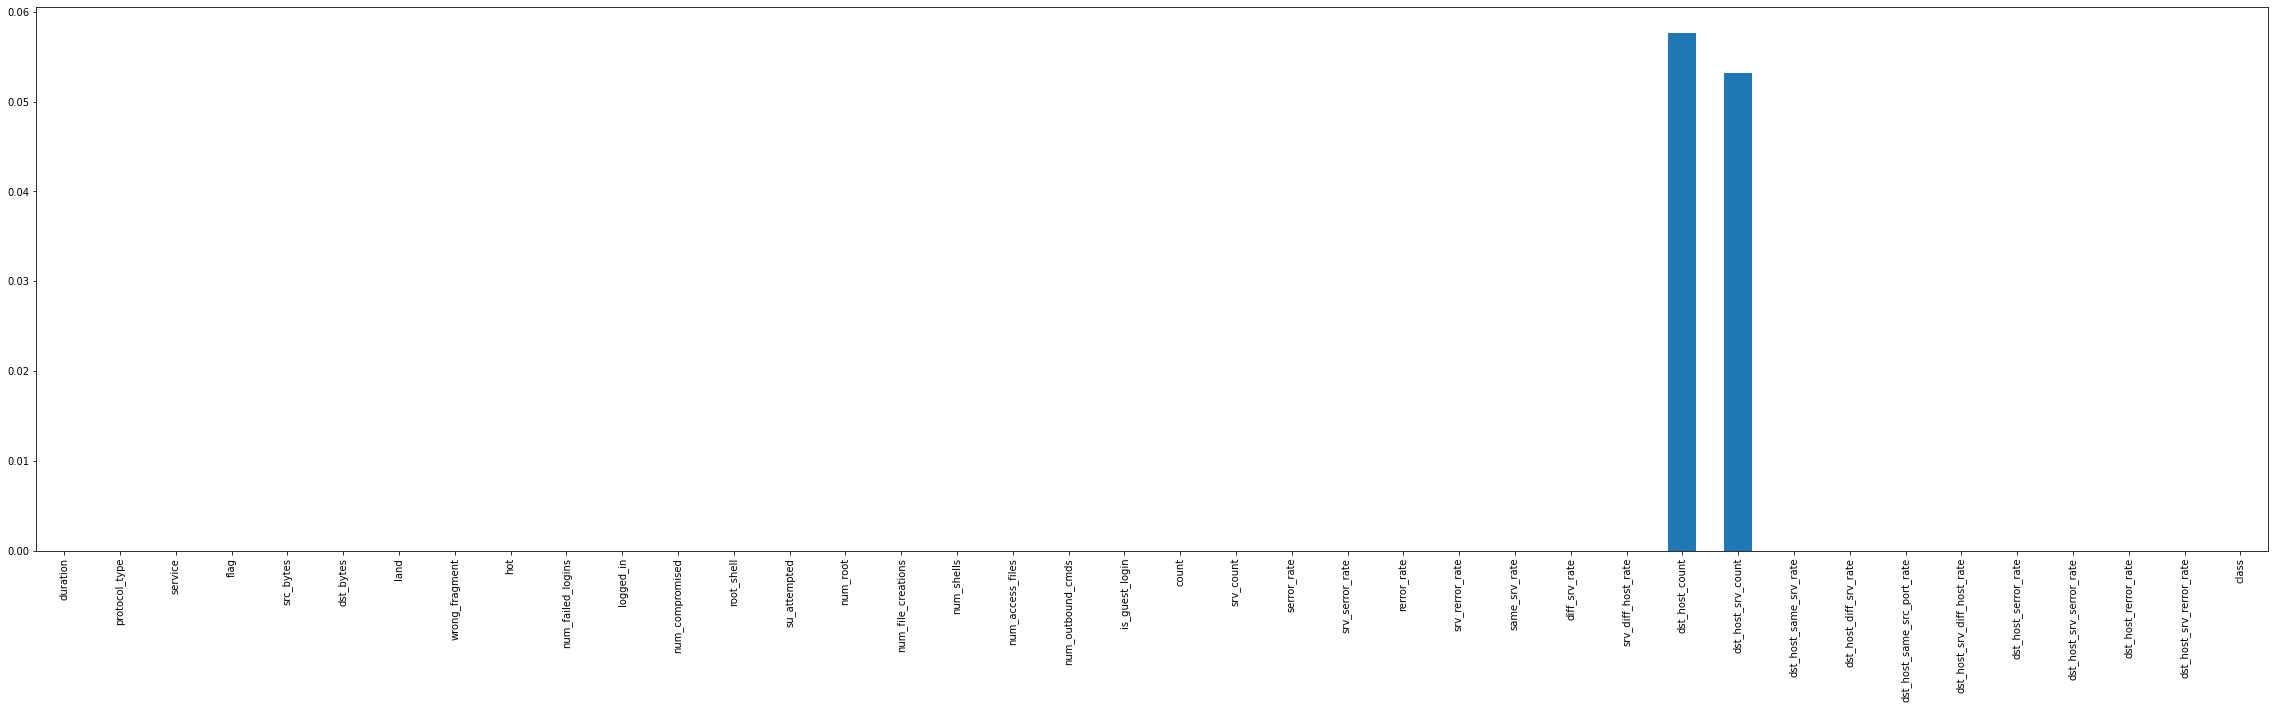

In [ ]:
(100*(raw_data.isna().sum()/raw_data.shape[0])).plot(kind ='bar')

# Feature Selection/Correlation

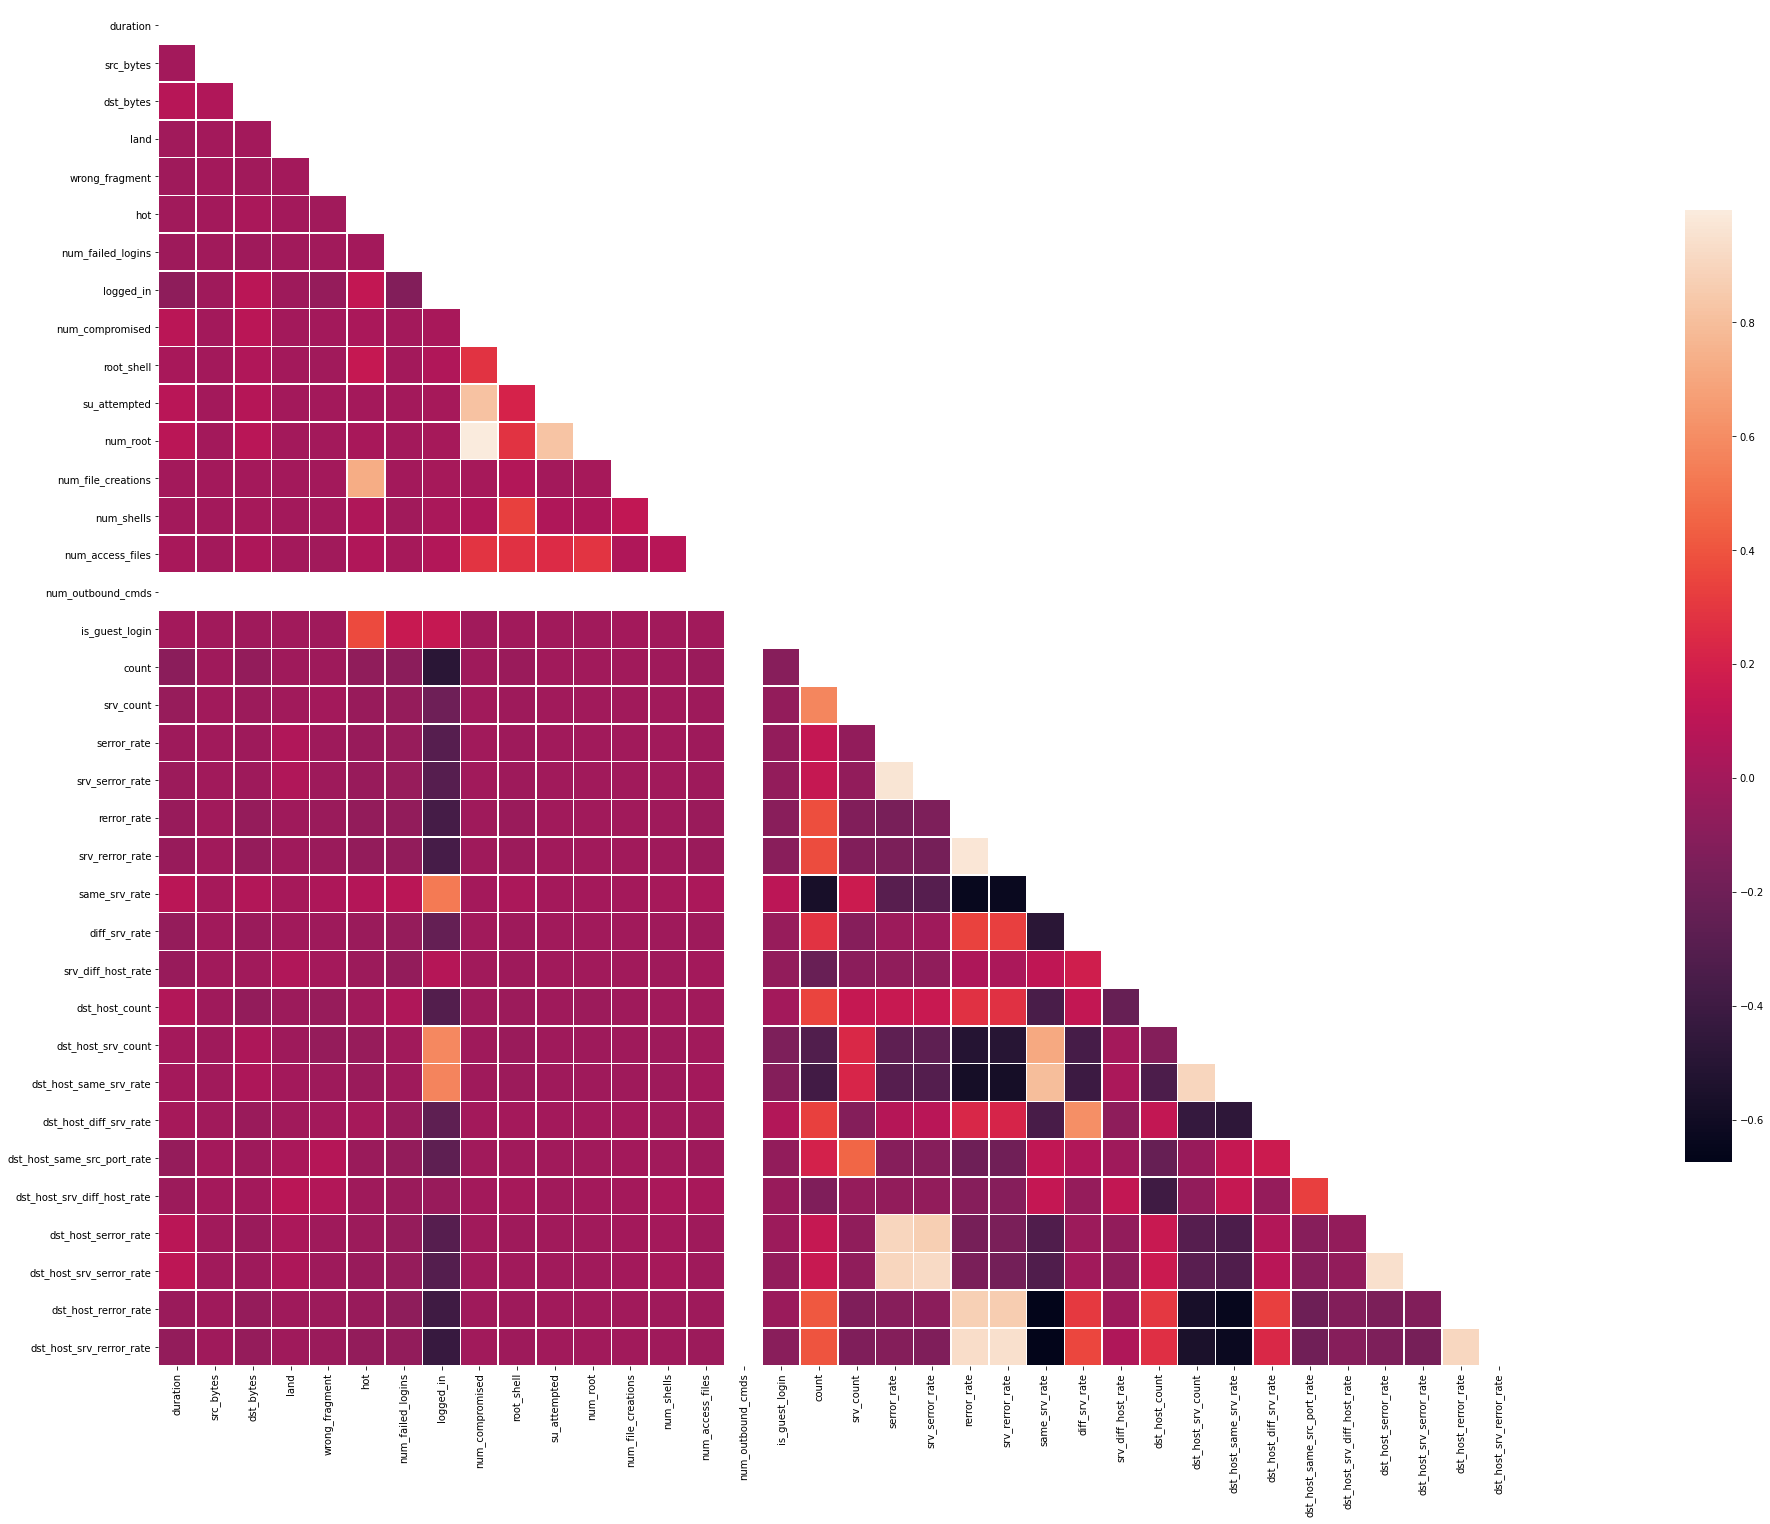

In [ ]:
plt.rcParams['figure.figsize'] = (60, 25)
mask = np.zeros_like(raw_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(raw_data.corr(),square=True, mask=mask, linewidths=.5, cbar_kws={"shrink": .7})

# **Data Preparation Phase**

Let us drop below columns as these are having very high (+/-) correlation


1.   num_outbound_cmds
2.   dst_host_serror_rate
3.   dst_host_srv_serror_rate
4. dst_host_rerror_rate
5. dst_host_srv_rerror_rate
6. dst_host_same_srv_rate
7. dst_host_srv_count
8. same_srv_rate
9. logged_in
10. num_compromised



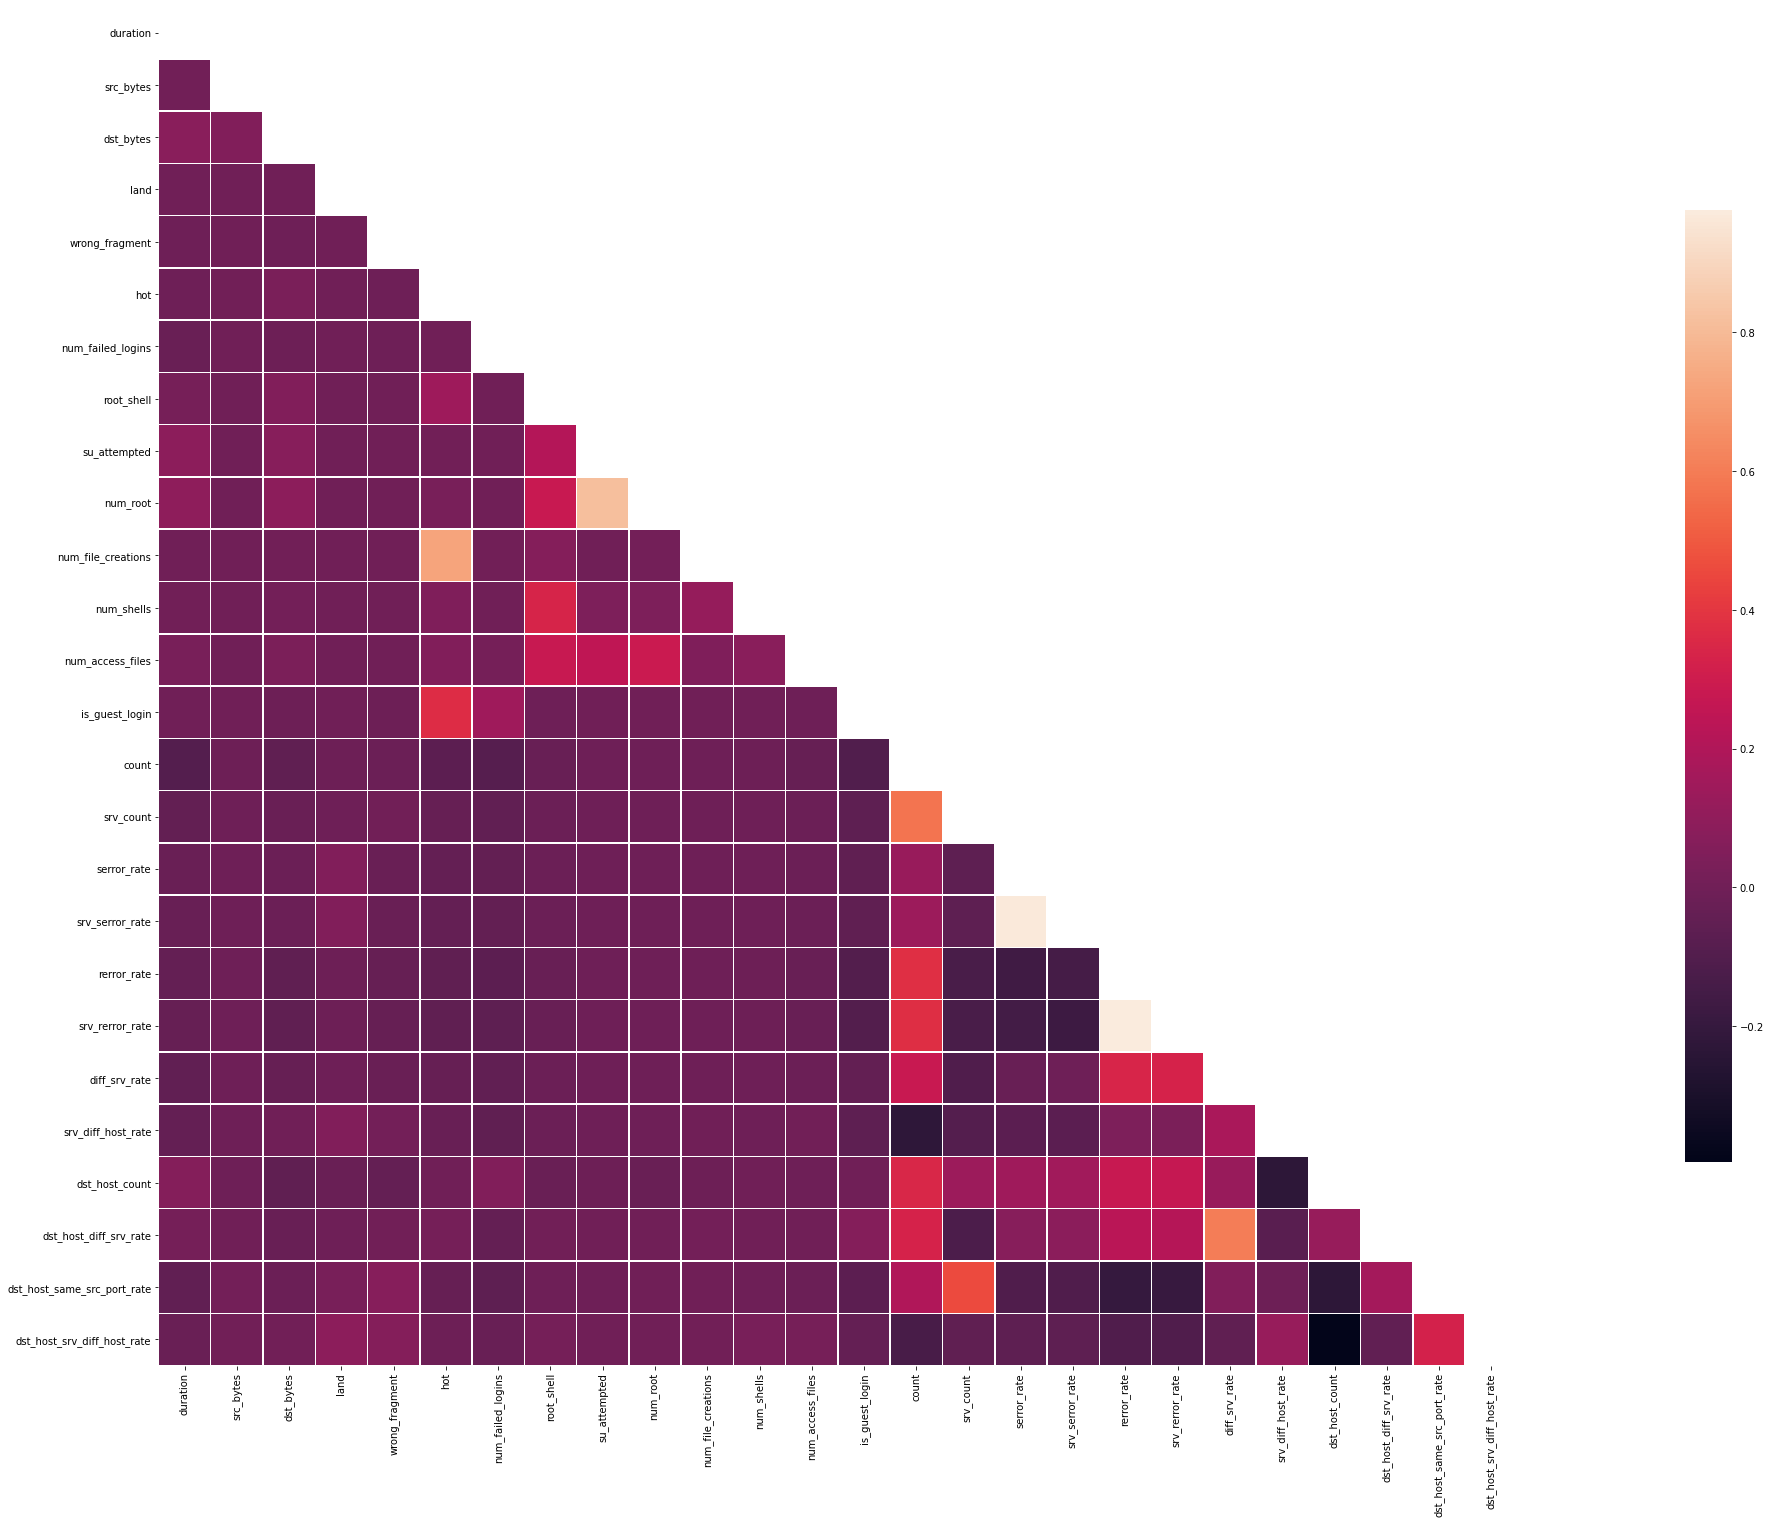

In [ ]:
corr_removed_data = raw_data.drop(columns=['dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'dst_host_same_srv_rate',
'dst_host_srv_count',
'same_srv_rate',
'logged_in',
'num_outbound_cmds','num_compromised'], axis=1)

plt.rcParams['figure.figsize'] = (60, 25)
mask = np.zeros_like(corr_removed_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(corr_removed_data.corr(),square=True, mask=mask, linewidths=.5, cbar_kws={"shrink": .7})

In [ ]:
corr_removed_data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'hot', 'num_failed_logins',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'class'],
      dtype='object')

In [ ]:
corr_removed_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.06,0.00,255.0,0.06,0.00,0.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.06,0.00,255.0,0.06,0.00,0.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,0.00,0.00,134.0,0.04,0.61,0.02,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,0.00,1.00,3.0,0.00,1.00,0.28,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,0.00,0.75,29.0,0.17,0.03,0.02,anomaly


In [ ]:
corr_removed_data.shape

(22544, 30)

**Comment:**  So we have dropped 10 columns due to high correlations

## Feature Engineering

Transforming our data into something with predictive power.

In [ ]:
raw_data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate          

As data type of *protocol_type, service & flag* are *object*, it should be converted to integer or floating point values in-order to carry out mathematical operations.

### Null value treatment

In [ ]:
##Identifying presence of NaN values in dataframe
corr_removed_data.isnull().values.any()

True

As evaluated above, there are **NaN** values in data frame and that has to be resolved befored building the model.

In [ ]:
raw_data = corr_removed_data.dropna()

### Transformation/Encoding of Categorical Attributes

Categorical Variable to int/floating point values

Here we are mapping protocol_type, flag and class with a integer value for further mathematical operations as there are currently string values. **Nominal encoding** can be used here as we are not concerned about ordering of these values while evaulating. 

In [ ]:
flagmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
raw_data['flag'] = raw_data['flag'].map(flagmap)

target_mapper = {'anomaly':1, 'normal':0}
raw_data['class'] = raw_data['class'].map(target_mapper)

Applying **OneHotEncoder** to **protocol_type** column

Given a dataset with two features, we let the encoder find the unique values per feature and transform the data to a binary one-hot encoding. In the given dataset for protocol_type column we have three unique values and applying **OneHotEncoder** on them would be beneficial as we are concentrating  more on the binary values here. One-hot encoded vectors using the get_dummies() function.

While creating k dummy values, as kth dummy variable is redundant we are dropping it during creation time itself.

In [ ]:
y = pd.get_dummies(raw_data['protocol_type'], prefix='Protocol',drop_first=True)
print(y.head())

   Protocol_tcp  Protocol_udp
0             1             0
1             1             0
2             1             0
3             0             0
4             1             0


In [ ]:
raw_data = pd.concat([raw_data, y], axis = 1) 
raw_data = raw_data.drop(['protocol_type'], axis = 1)
raw_data.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,class,Protocol_tcp,Protocol_udp
0,0,private,2,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.06,0.00,255.0,0.06,0.00,0.00,1,1,0
1,0,private,2,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.06,0.00,255.0,0.06,0.00,0.00,1,1,0
2,2,ftp_data,0,12983,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,0.00,0.00,134.0,0.04,0.61,0.02,0,1,0
3,0,eco_i,0,20,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,0.00,1.00,3.0,0.00,1.00,0.28,1,0,0
4,1,telnet,4,0,15,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,0.00,0.75,29.0,0.17,0.03,0.02,1,1,0


Column number would increase as we are adding new columns from One hot encoder

In [ ]:
raw_data.shape

(22531, 31)

In the dataset there is a feature vector **service** which needs to be transformed/encoded. We do not want to go with label encoding as there is a risk of algorithm considering them as having some order or relationship. So we have decided to transform them using **frequency** encoder, as it is 
* Straightforward to implement
* Does not expand the feature space
* Can work well enough with tree based algorithms

Inorder to avoid **data leakage** issues we would be splitting the train and test data then applying frequency encoding.

Seperate the independent and dependent features and also split the data into train and test sets.

In [ ]:
x = raw_data.loc[:, raw_data.columns != 'class']
y = raw_data['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [ ]:
encoder = CountFrequencyEncoder(encoding_method='frequency',variables=['service'])
encoder.fit(x_train)
x_train = encoder.transform(x_train)
x_test = encoder.transform(x_test)

# Feature Selection

### Variance Threshold

The variance threshold is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some variance threshold. 

In [ ]:
v_threshold = VarianceThreshold(0.1)
v_threshold.fit(x_train)
v_threshold_columns = x_train.columns[v_threshold.get_support()]

### Information Gain

Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

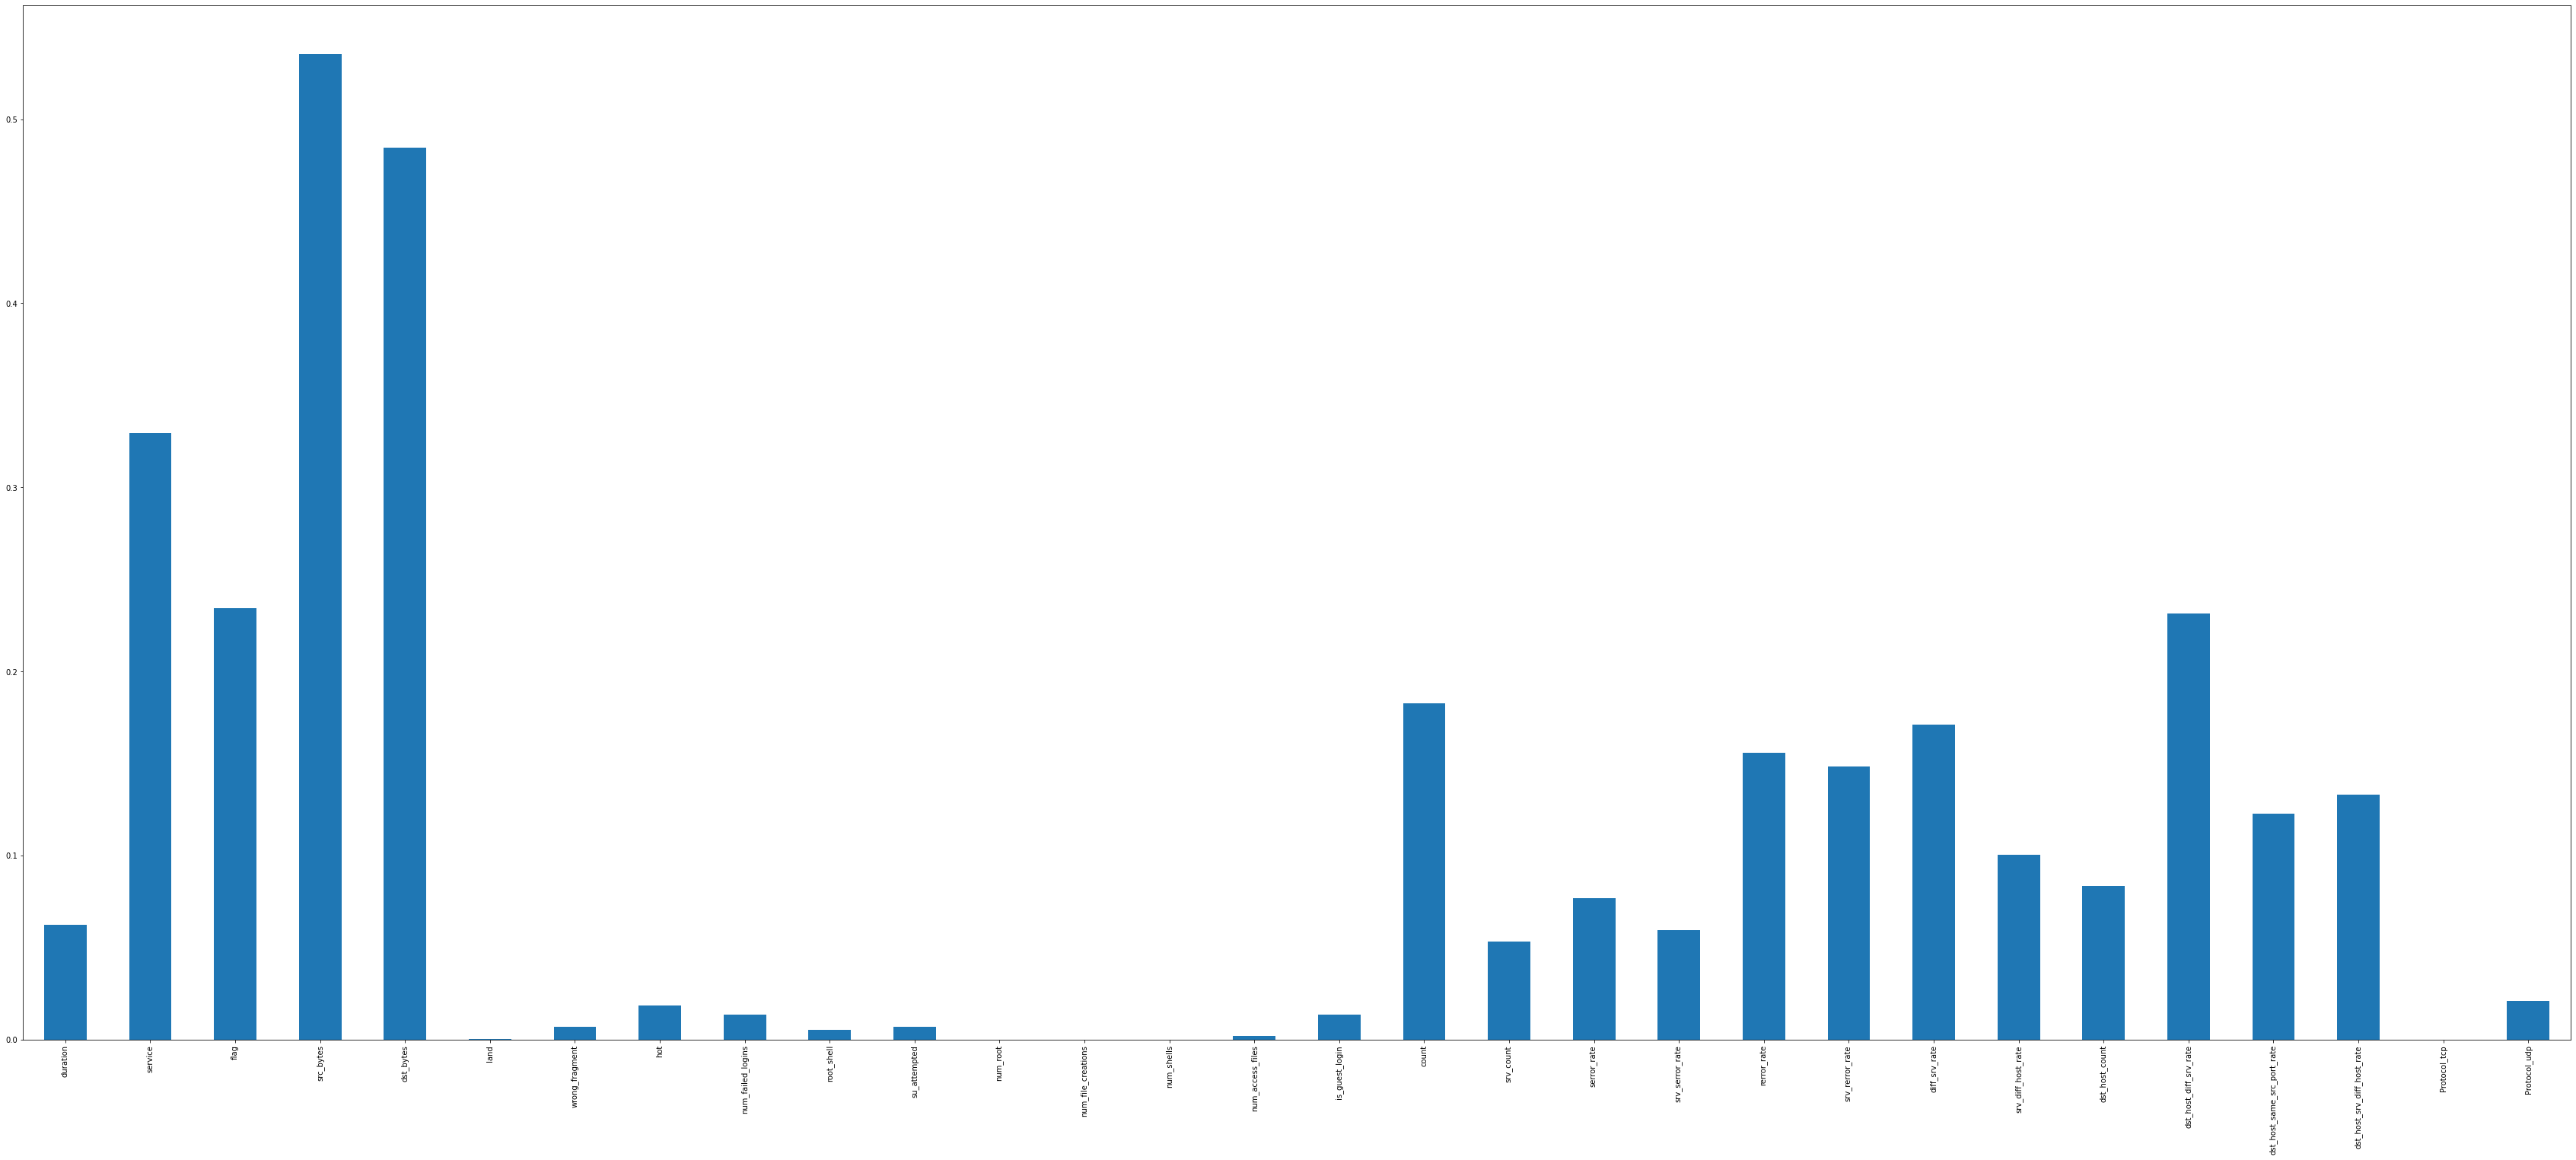

In [ ]:
importances = mutual_info_classif(x_train, y_train)
feature_importance = pd.Series(importances, x_train.columns)
feature_importance.plot(kind='bar')

Since we belive this method is more statistical way of choosing features, we are performing feature selection using this method.

In [ ]:
feature_importance_df = feature_importance.to_frame()
feature_importance_df = feature_importance_df.reset_index()

x_train = x_train[feature_importance_df[feature_importance_df[0]>0.1]['index']]
x_test = x_test[feature_importance_df[feature_importance_df[0]>0.1]['index']]

In [ ]:
print('Variance methode selected column count is: ',len(v_threshold_columns))
print('Information Gain methode selected column count is: ',len(x_train.columns))

Variance methode selected column count is:  14
Information Gain methode selected column count is:  12


In [ ]:
 print(np.intersect1d(x_train.columns, v_threshold_columns))

['count' 'dst_bytes' 'flag' 'rerror_rate' 'src_bytes' 'srv_rerror_rate']


Using Information Gain method we have selected 12 columns out of which 6 columns are suggested by Varience method too. This shows even though 14 columns are having decent variations in the data, but only **6 out of 14** are contributing for the information gain. On the other hand there are 6 columns where not much variations are there but still they contribute for the infromations.

# Modeling

### Model-1 : Logistic Regression

In [ ]:
clf = LogisticRegression(random_state = 0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
f1_LR=f1_score(y_test,y_pred, average='macro')
print("Training Accuracy: ",clf.score(x_train, y_train))
print("Testing Accuracy: ", clf.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred)) 

Training Accuracy:  0.7797964256124985
Testing Accuracy:  0.7827090360376353
[[2311  101]
 [1123 2098]]
              precision    recall  f1-score   support

           0       0.67      0.96      0.79      2412
           1       0.95      0.65      0.77      3221

    accuracy                           0.78      5633
   macro avg       0.81      0.80      0.78      5633
weighted avg       0.83      0.78      0.78      5633



0.9099802652884805

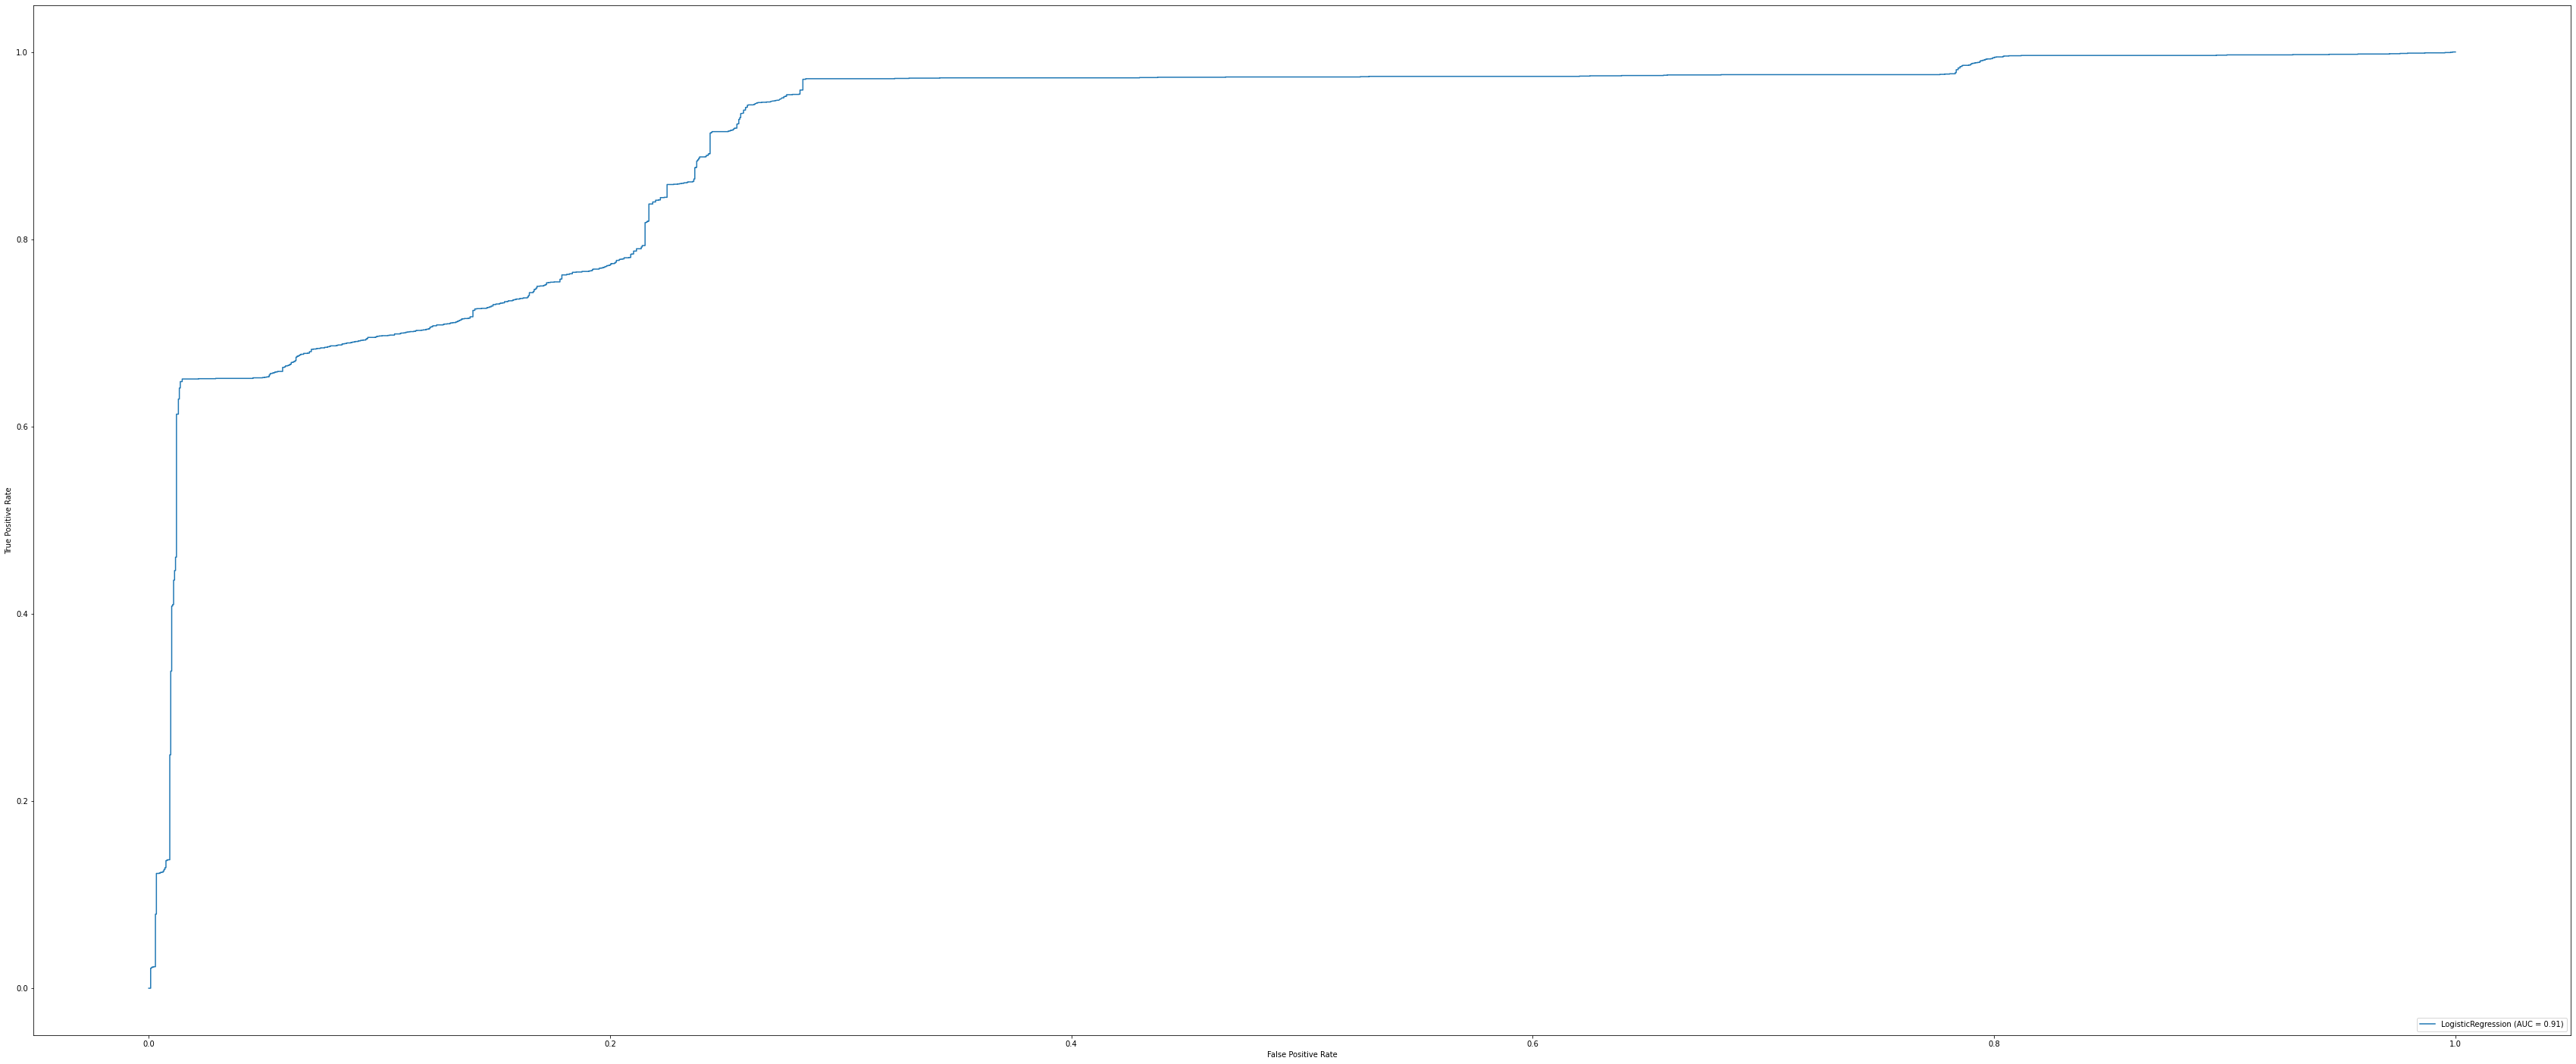

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(clf, x_test, y_test)  
metrics.roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])

We have got a stable model with low variance, this model does a decent job of identifying all the anomaly traffic with the recall value of 0.90 and precision of 0.8. 

We can take this model as base model and build other models and compare the performances, as this model does not do a satisfactory job of identifying the normal traffic with comparatively low recal value of 0.72

### Model-2 : KNN

In [ ]:
estimator_KNN = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'n_neighbors': (1,6, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')
}

grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

KNN_1=grid_search_KNN.fit(x_train, y_train)
y_pred_KNN1 =KNN_1.predict(x_test)

#Parameter setting that gave the best results on the hold out data.
print(grid_search_KNN.best_params_ ) 
#Mean cross-validated score of the best_estimator
print('Best Score - KNN:', grid_search_KNN.best_score_ )


{'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
Best Score - KNN: 0.973606140257175


In [ ]:
clf = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 1,weights= 'distance', leaf_size= 40)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
f1_KNN=f1_score(y_test,y_pred, average='macro')
print("Training Accuracy: ",clf.score(x_train, y_train))
print("Testing Accuracy: ", clf.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Training Accuracy:  0.9963309267368919
Testing Accuracy:  0.9792295402094798
[[2351   61]
 [  56 3165]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2412
           1       0.98      0.98      0.98      3221

    accuracy                           0.98      5633
   macro avg       0.98      0.98      0.98      5633
weighted avg       0.98      0.98      0.98      5633



0.9924333753976675

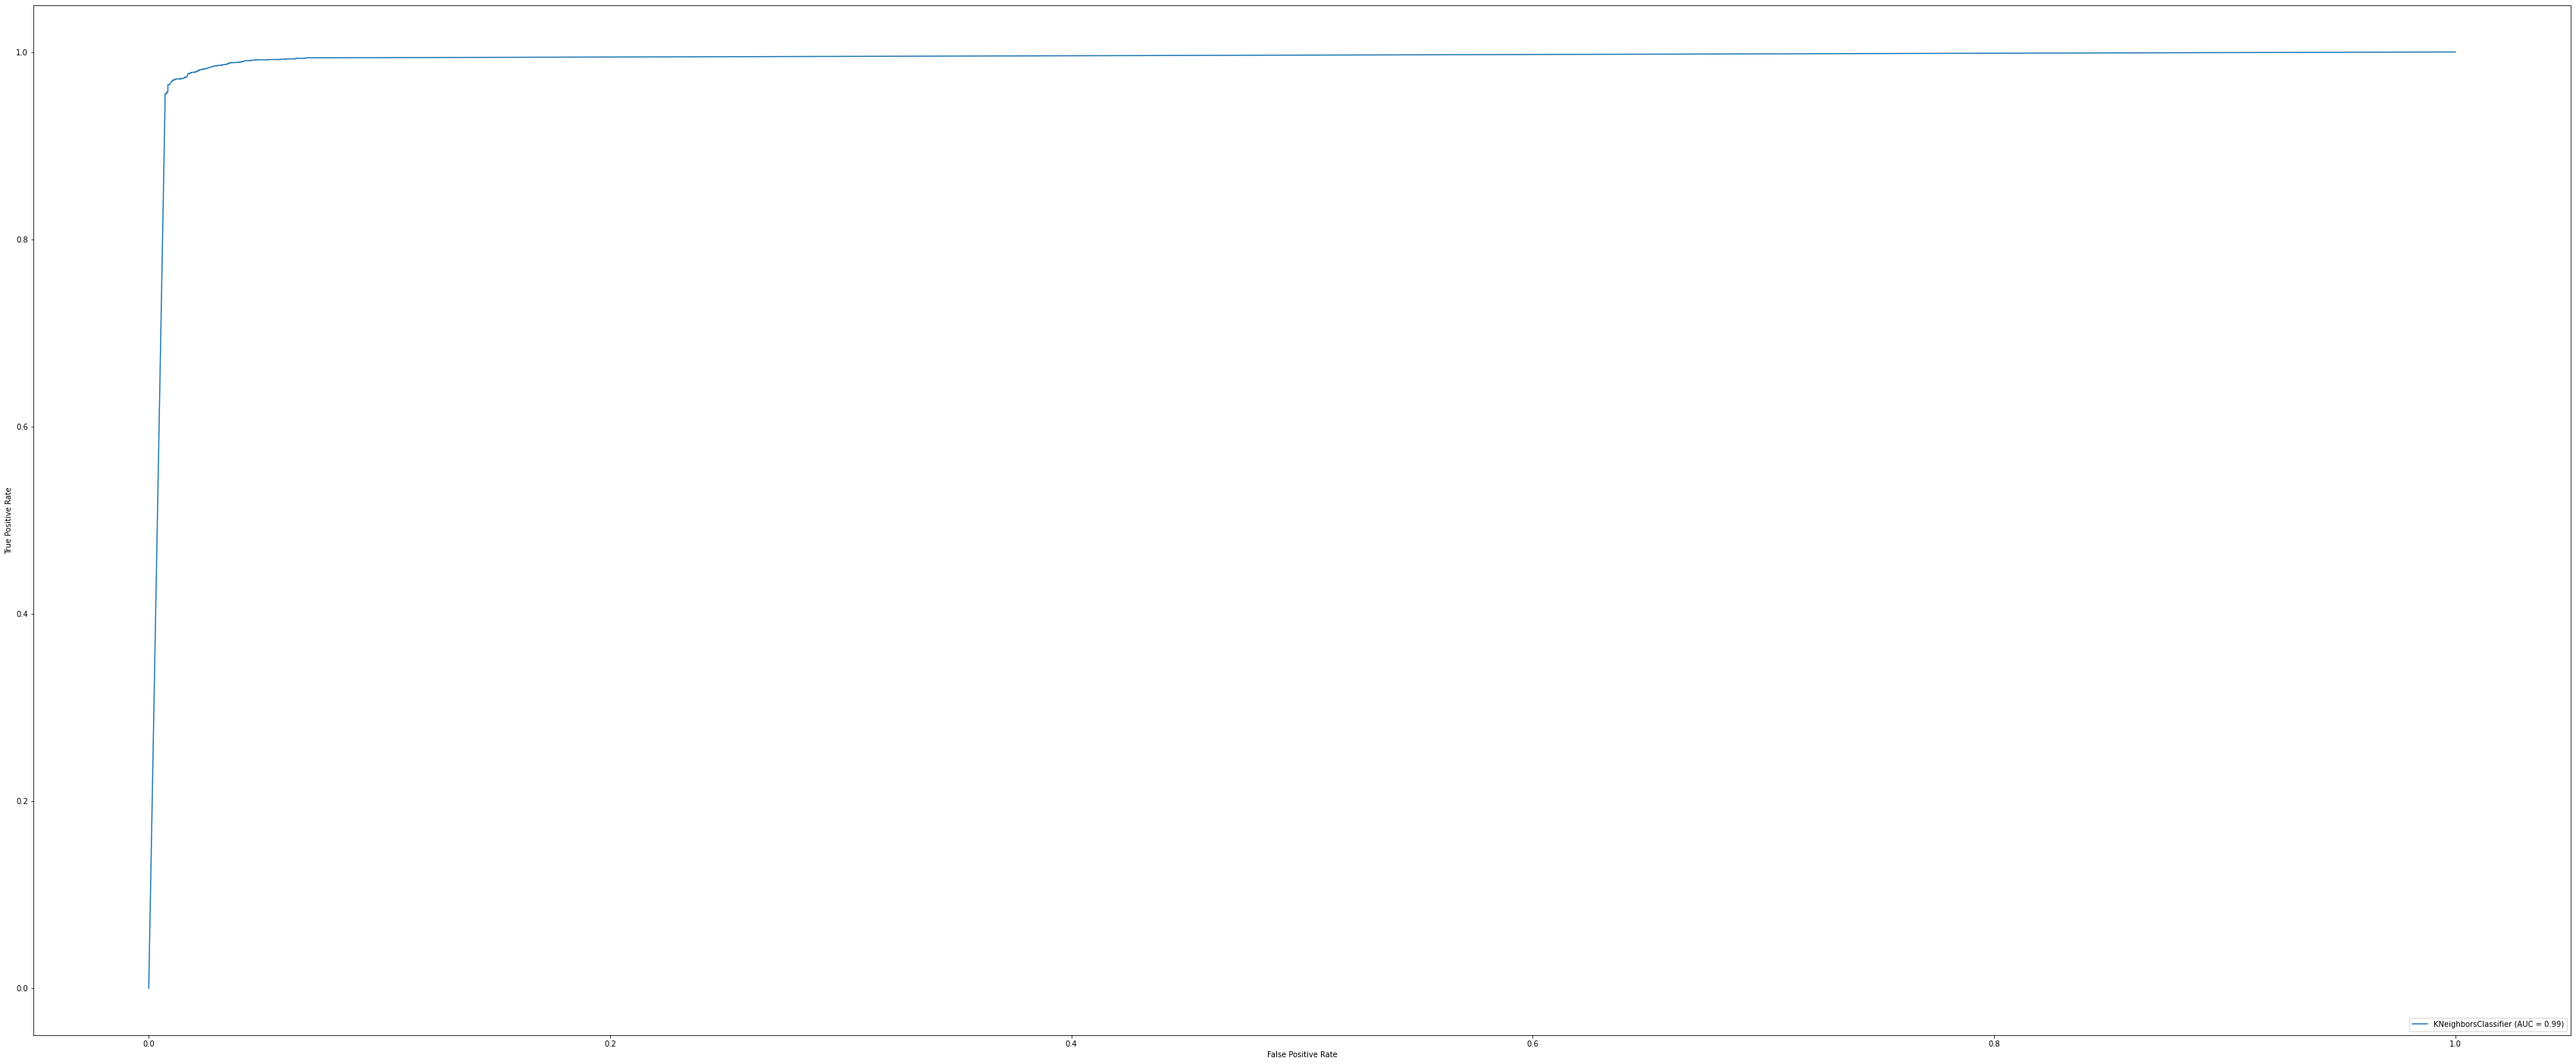

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(clf, x_test, y_test)  
metrics.roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])

**Conclusion:** Using KNN a we got pretty good model with good accuracy and recal value. AUC also seems to be satisfactory with 0.97 value which is very close to 1

### Model-3: Random Forest

In [ ]:
param_grid = { 
    'n_estimators': [10, 30, 50, 40],
    'criterion':['gini','entropy'],
    'min_samples_split':[5,10,30,80],
    'min_samples_leaf':[5, 10,25],
    'max_features': ['auto', 'sqrt', 'log2']
}
clf = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5,n_jobs=-1)
CV_rfc.fit(x_train, y_train)
print(CV_rfc.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 30}


In [ ]:
RFC = CV_rfc.best_estimator_
RFC.fit(x_train, y_train.values.ravel())
print("Train score is:", RFC.score(x_train, y_train))
print("Test score is:",RFC.score(x_test,y_test))
f1_RFC=f1_score(y_test,RFC.predict(x_test), average='macro')

Train score is: 0.9892886732157652
Test score is: 0.9840227232380614


In [ ]:
cm = confusion_matrix(y_test, RFC.predict(x_test))
print(cm)
print(classification_report(y_test,RFC.predict(x_test)))

[[2362   50]
 [  40 3181]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2412
           1       0.98      0.99      0.99      3221

    accuracy                           0.98      5633
   macro avg       0.98      0.98      0.98      5633
weighted avg       0.98      0.98      0.98      5633



**Conclusion** : Random forest classifier is providing better accuracy and recall value as **KNN** model. This model also has less varience

### Model-4: SVM

In [ ]:
from sklearn.svm import SVC
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]}]
scores = ['recall']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(x_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    f1_SVC=f1_score(y_true, y_pred, average='macro')
    print()

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.960 (+/-0.006) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.946 (+/-0.007) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.966 (+/-0.007) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.951 (+/-0.008) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.970 (+/-0.004) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.958 (+/-0.007) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.975 (+/-0.003) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.961 (+/-0.006) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2412
           1       0.98      0.97      0.98      3221

    accuracy   

**Conclussion:** SVM model is no better than KNN, it almost performing same as KNN.

# **Evaluation**

* Random Forest seems to be performance is good when compared to other 3 models. It got good Recal and accuracy. Its varience also low. Below we have printed the **AUR/ROC** which looks to be pretty good.

* For RFC we got 0.97 and 0.98 accuracy and recal for both Normal and Anomaly traffic. From this we can conclude we can idenify the anomaly traffic 98% of the time and Properly idenify the normal traffic 97% of times. 

* **Question for Business:** Here we got a recla value of 0.97 for normal traffic, which indicates in 3% of cases we are marking the normal traffic as Anomaly, is this acceptable? Or any improvements needs to be done in this area?


0.999051171236851

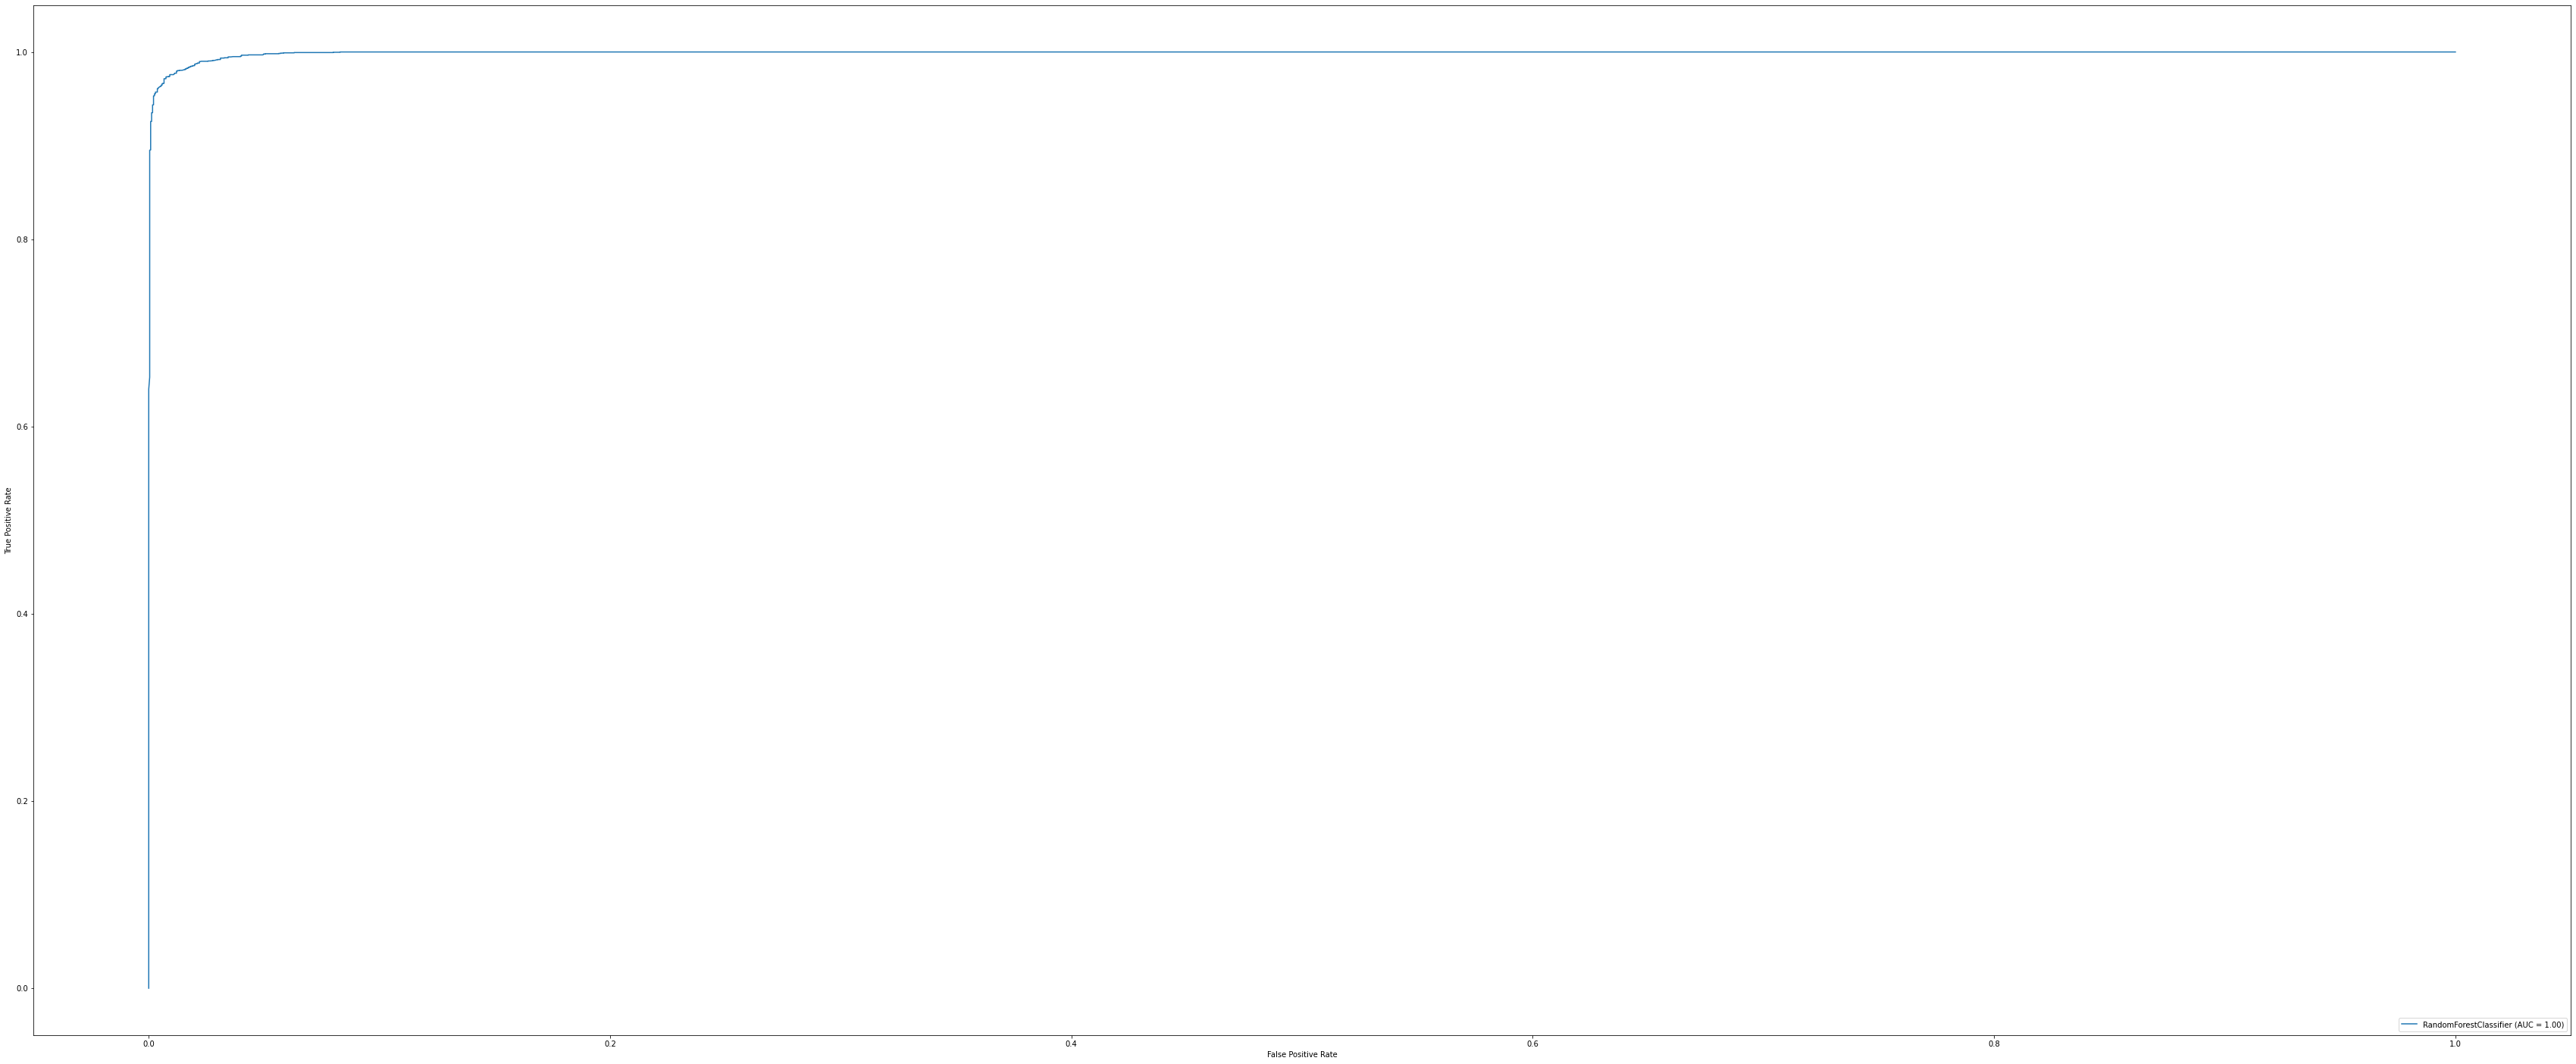

In [ ]:
metrics.plot_roc_curve(RFC, x_test, y_test)  
metrics.roc_auc_score(y_test, RFC.predict_proba(x_test)[:, 1])

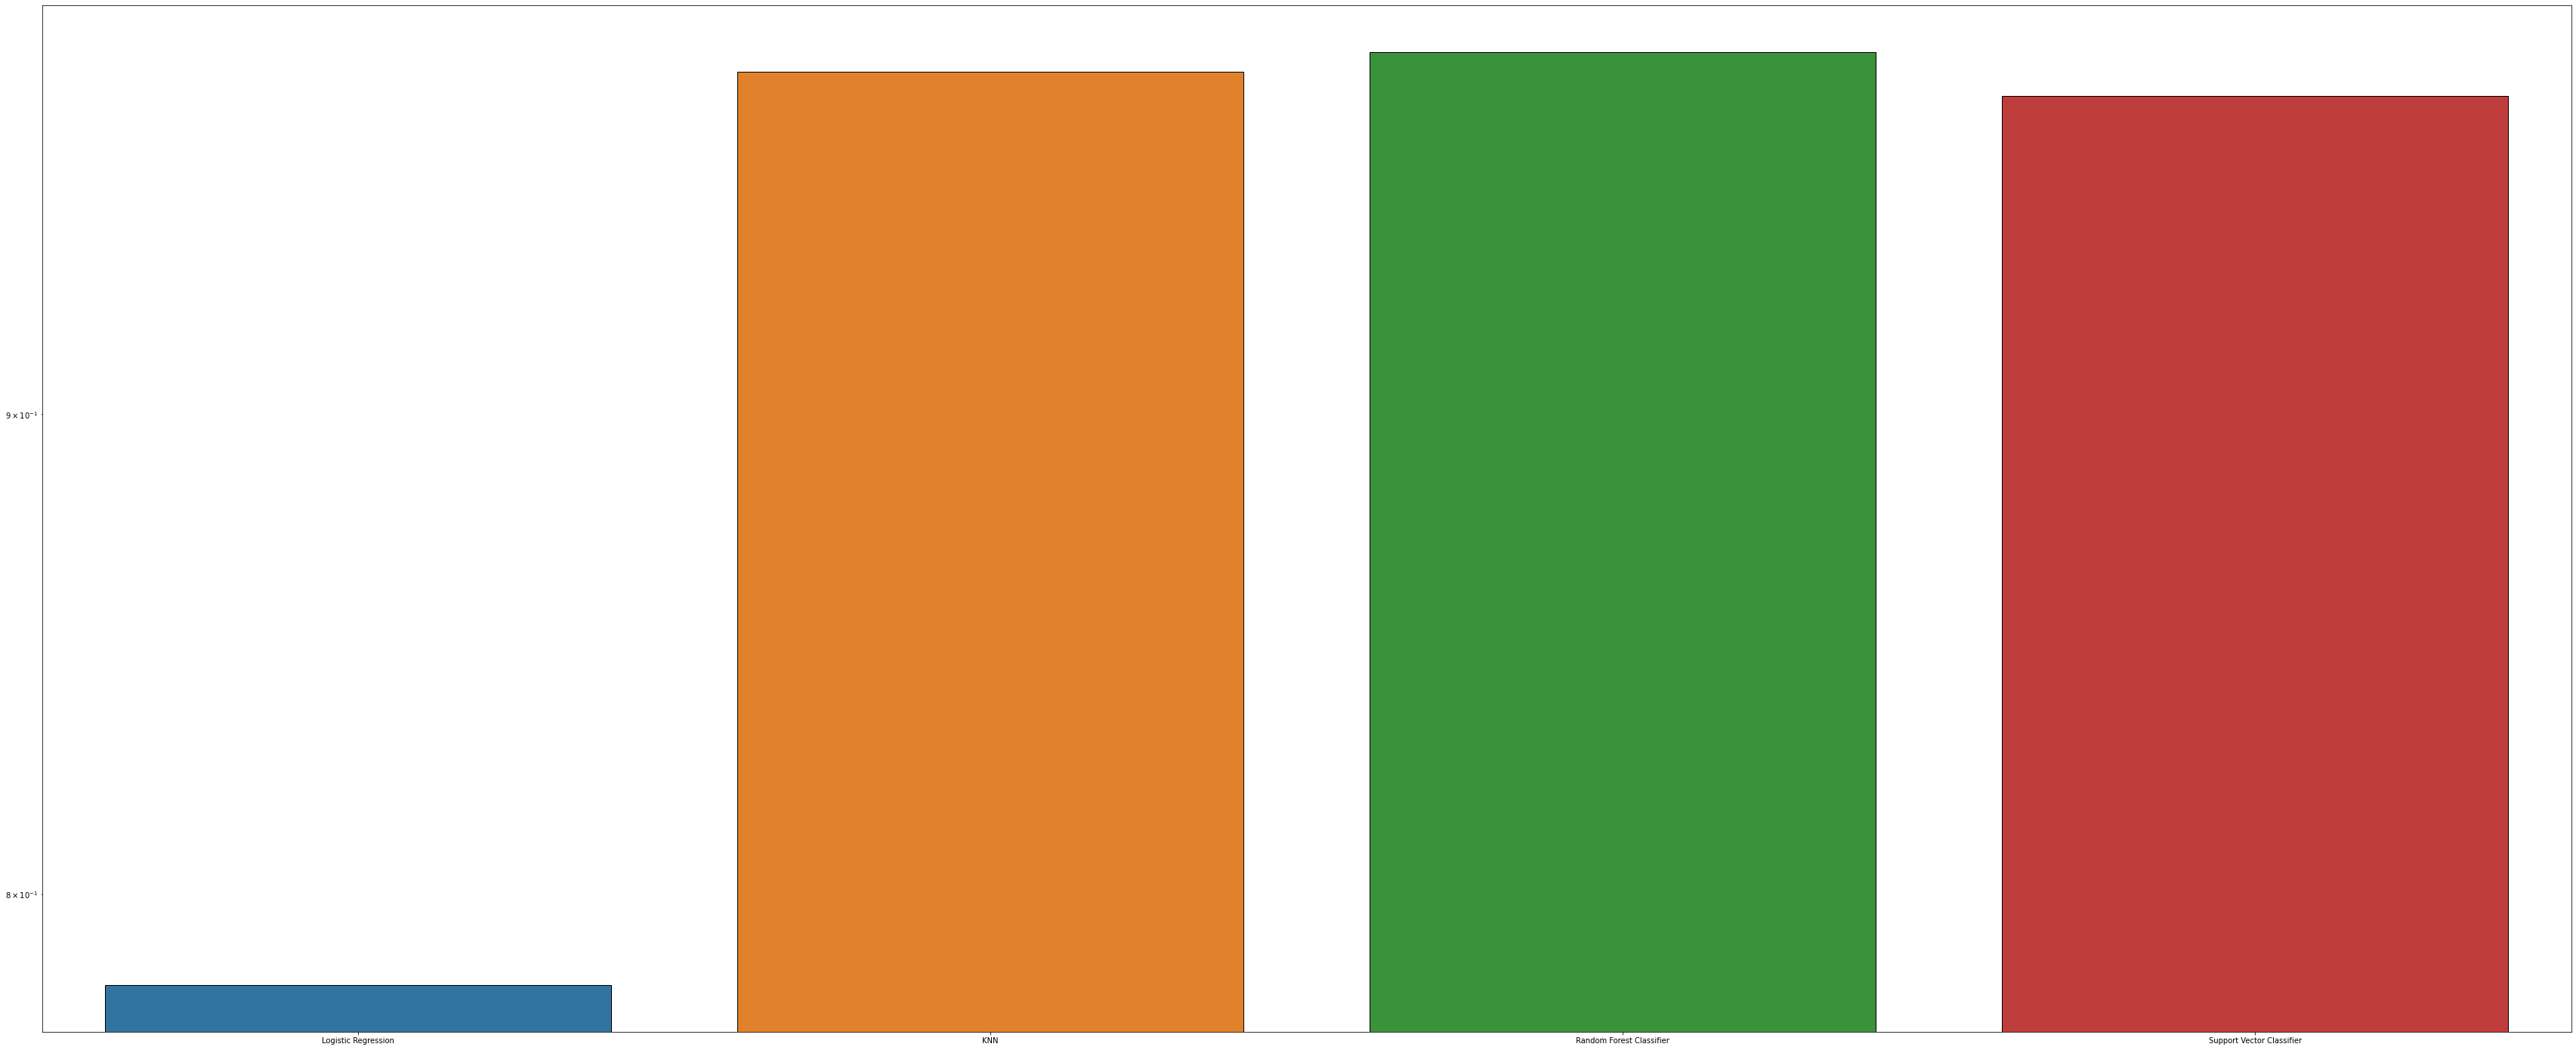

In [ ]:
models=['Logistic Regression','KNN','Random Forest Classifier','Support Vector Classifier']
sb.barplot(x=models, y=[f1_LR,f1_KNN, f1_RFC, f1_SVC], log=True, ec="k")